In [5]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)
# setting the precision of floating numbers to 3 decimal points
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# Library to split data
from sklearn.model_selection import train_test_split

# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV


# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

import warnings
warnings.filterwarnings("ignore")

from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter("ignore", ConvergenceWarning)

In [6]:
#Loading the dataset, and making a copy
hotel = pd.read_csv("INNHotelsGroup.csv")
data = hotel.copy()

## Data Overview

- Observations
- Sanity checks

In [8]:
# Chicking first 5 rows of the data
data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.000,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.680,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.000,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.000,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.500,0,Canceled


In [9]:
# Checking 5 last rows of the data
data.tail()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.800,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.950,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.390,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.500,0,Canceled
36274,INN36275,2,0,1,2,Meal Plan 1,0,Room_Type 1,207,2018,12,30,Offline,0,0,0,161.670,0,Not_Canceled


* Dataset is loaded correctly 

In [11]:
#Checking the shapeof the data
data.shape

(36275, 19)

* Dataset has 36275 rows and 19 columns 

In [13]:
# Checking the data type of the columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

* Dataset has 5 object, 1 fload and 13 int data types
* The dependant variable (booking_status) is object datatype

In [15]:
# Checking for duplicates
data.duplicated().sum()

0

* No duplicates in the dataset

In [17]:
# Checking for missing values
data.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

* No missing values in the dataset


In [19]:
# Checking statistical summary of the dataset
data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Booking_ID,36275,36275,INN00001,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
no_of_adults,36275.000,NaN,NaN,NaN,1.845,0.519,0.000,2.000,2.000,2.000,4.000
no_of_children,36275.000,NaN,NaN,NaN,0.105,0.403,0.000,0.000,0.000,0.000,10.000
no_of_weekend_nights,36275.000,NaN,NaN,NaN,0.811,0.871,0.000,0.000,1.000,2.000,7.000
no_of_week_nights,36275.000,NaN,NaN,NaN,2.204,1.411,0.000,1.000,2.000,3.000,17.000
type_of_meal_plan,36275,4,Meal Plan 1,27835,NaN,NaN,NaN,NaN,NaN,NaN,NaN
required_car_parking_space,36275.000,NaN,NaN,NaN,0.031,0.173,0.000,0.000,0.000,0.000,1.000
room_type_reserved,36275,7,Room_Type 1,28130,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lead_time,36275.000,NaN,NaN,NaN,85.233,85.931,0.000,17.000,57.000,126.000,443.000
arrival_year,36275.000,NaN,NaN,NaN,2017.820,0.384,2017.000,2018.000,2018.000,2018.000,2018.000


* From the statistical summary, we can see that out of 36,275 bookings, 24,390 were not canceled, meaning 11,885 bookings were canceled.
* The price per room varies from 0 to 540, with an average price of 103.42.
* Approximately two-thirds of bookings were made online.
* The median lead time from booking to arrival date is 57 days.

### Exploratory Data Analysis

In [23]:
# Checking uniqe values in Booking_ID column
data["Booking_ID"].nunique()

36275

* Booking_ID column has all uniqe values it is not valubale info for data analysys and model building. We will drop it

In [25]:
# Droping Booking_ID column
data.drop(["Booking_ID"], axis=1, inplace=True)

In [26]:
# Checking the data after dropping Booking_ID column 
data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.000,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.680,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.000,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.000,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.500,0,Canceled


In [27]:
# Let's check all uniqe values for categorical variables

# Making a list of all catrgorical variables
cat_col = [
    "type_of_meal_plan",
    "required_car_parking_space",
    "room_type_reserved",
    "arrival_year",
    "arrival_month",
    "arrival_date",
    "market_segment_type",
    "repeated_guest",
    "booking_status",
]

# Printing number of count of each unique value in each column
for column in cat_col:
    print(data[column].value_counts())
    print("-" * 40)

Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: type_of_meal_plan, dtype: int64
----------------------------------------
0    35151
1     1124
Name: required_car_parking_space, dtype: int64
----------------------------------------
Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: room_type_reserved, dtype: int64
----------------------------------------
2018    29761
2017     6514
Name: arrival_year, dtype: int64
----------------------------------------
10    5317
9     4611
8     3813
6     3203
12    3021
11    2980
7     2920
4     2736
5     2598
3     2358
2     1704
1     1014
Name: arrival_month, dtype: int64
----------------------------------------
13    1358
17    1345
2     1331
4     1327
19    1327
16    1306
20    1281
15    1273
6     1273
18    1260
14    1242
30    1216
12    1204
8     1198
29    1190
21    1158
5     1154


### Univariate Analisys

In [29]:
# Function to plot a boxplot and a histogram along the same scale.

def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined
    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid = 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [30]:
# Function to create labeled barplots

def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top
    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        hue=feature,
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

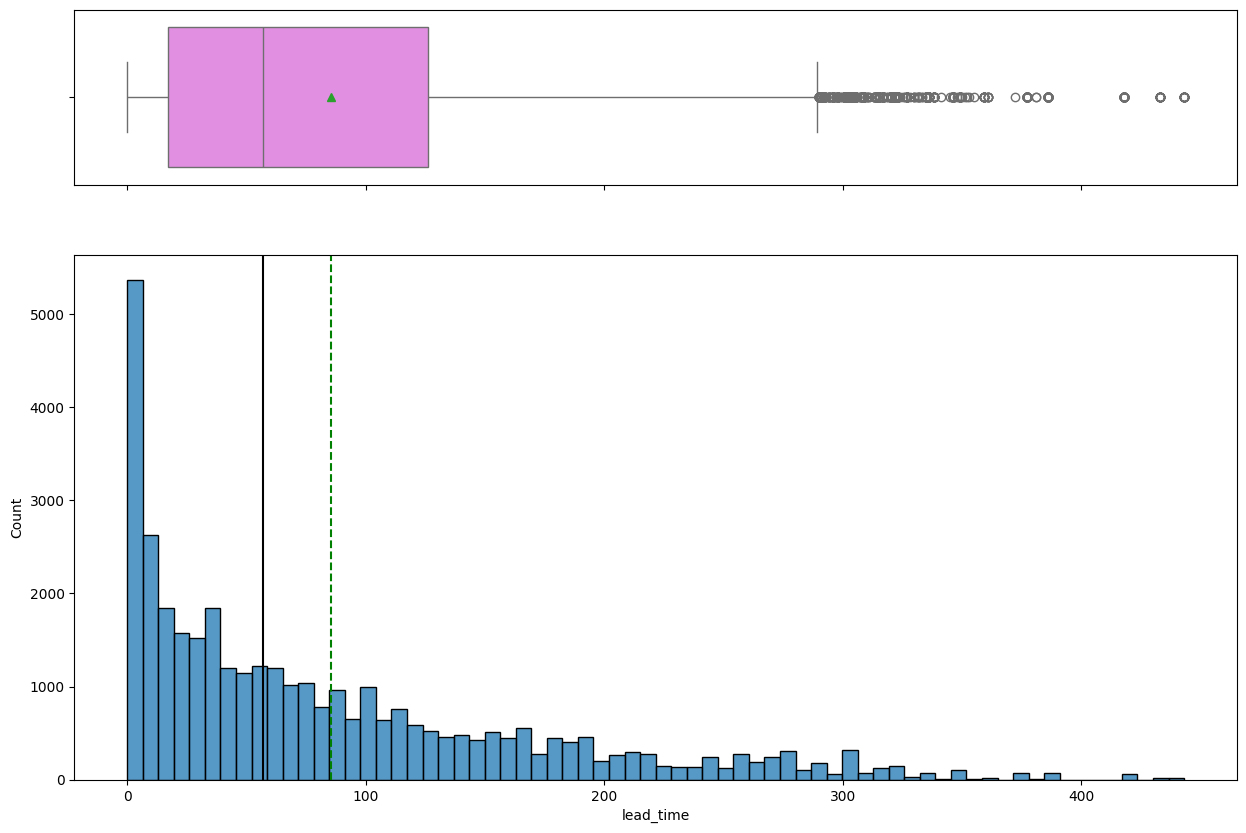

In [31]:
# Histogram and boxplot for lead time
histogram_boxplot(data, "lead_time")

* Median lead time is 57 days
* Some outliers are present on the right side of the boxplot

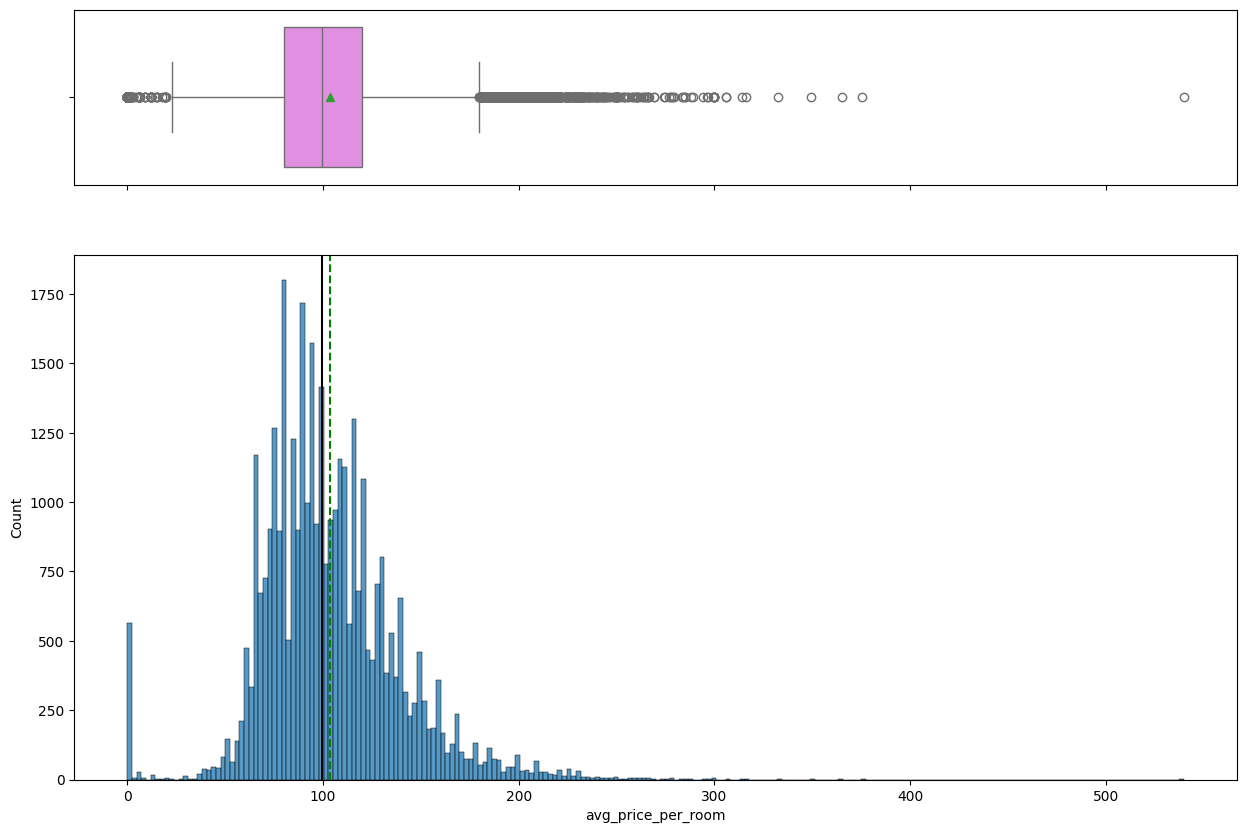

In [33]:
# Histogram and boxplot for avg price per room
histogram_boxplot(data, "avg_price_per_room")

* Average and median room prices approximetely 100 
* Average price distribution looks right skewed
* Boxplot has outliers on both sides
* Some rooms have price zero. Let's check what market segment type are those.

In [35]:
# Looking deeper ino rooms that are priced zero and what market segment type are those
data.loc[data["avg_price_per_room"] == 0, "market_segment_type"].value_counts()

Complementary    354
Online           191
Name: market_segment_type, dtype: int64

* Some rooms that are priced zero are complementary and some are booked online.

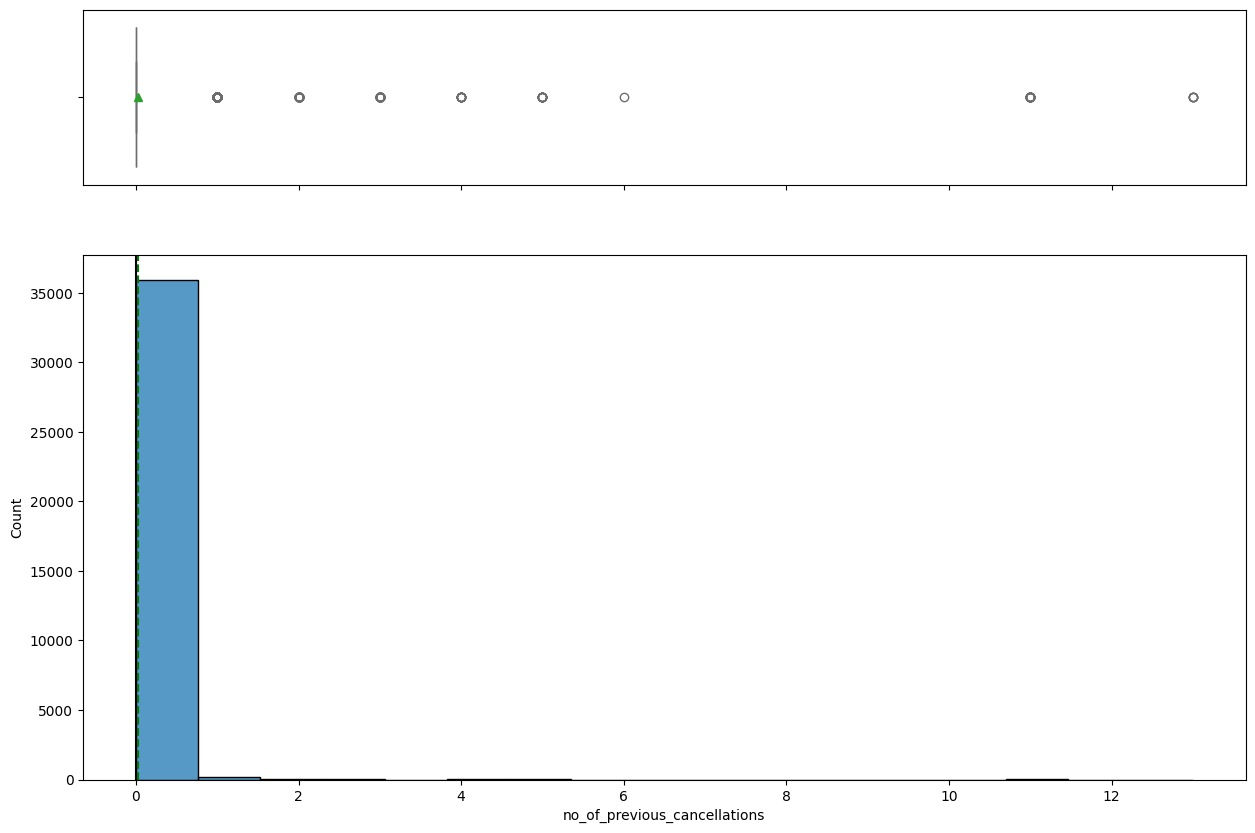

In [37]:
# Histogram and boxplot for number of previous cancelations
histogram_boxplot(data, 'no_of_previous_cancellations')

* A vast majority of customers have zero previous cancellations, but some have multiple.

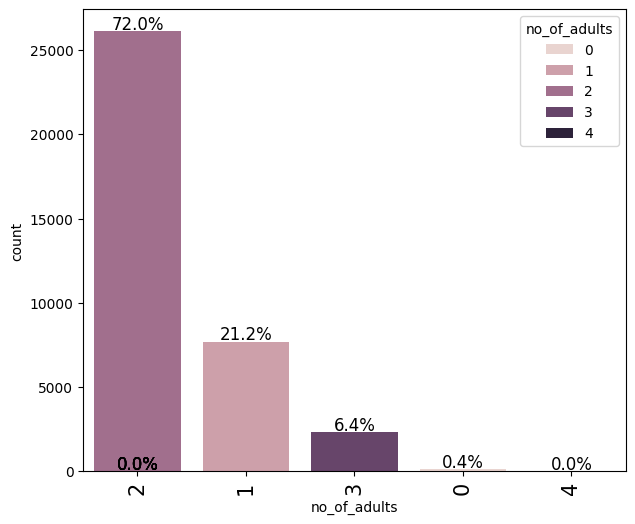

In [39]:
# Labeled barplot for number of adults for each booking in percentage
labeled_barplot(data, "no_of_adults", perc=True)

* 72% of bookings are for two adults, 21.2% are for one adult, and 6.4% are for three adults.

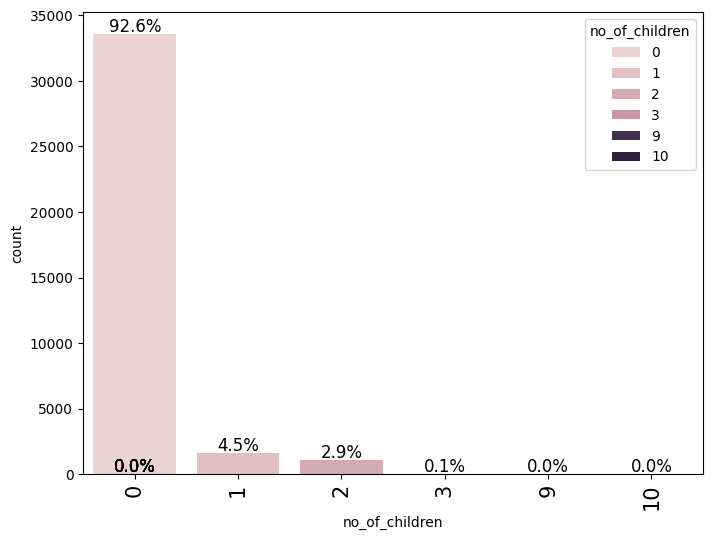

In [41]:
# Labeled barplot for number of children for each booking in percentage
labeled_barplot(data, "no_of_children", perc=True)

* 92.6% of bookings are without children, 4.5% have one child, and 2.9% have two children.
* Bookings with nine or ten children are showing 0.0% in our visualization, meaning these are extremely rare cases and have no significant benefit for our analysis and model building. It is better to combine these with the category of three children.

In [43]:
# replacing 9, and 10 children with 3
data["no_of_children"] = data["no_of_children"].replace([9, 10], 3)

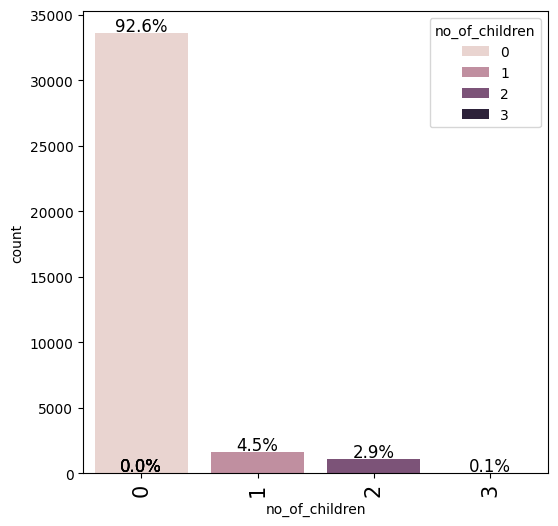

In [44]:
# Bar plot showing the percentage distribution of the number of children, with nine and ten children combined into the three-children category.
labeled_barplot(data, "no_of_children", perc=True)

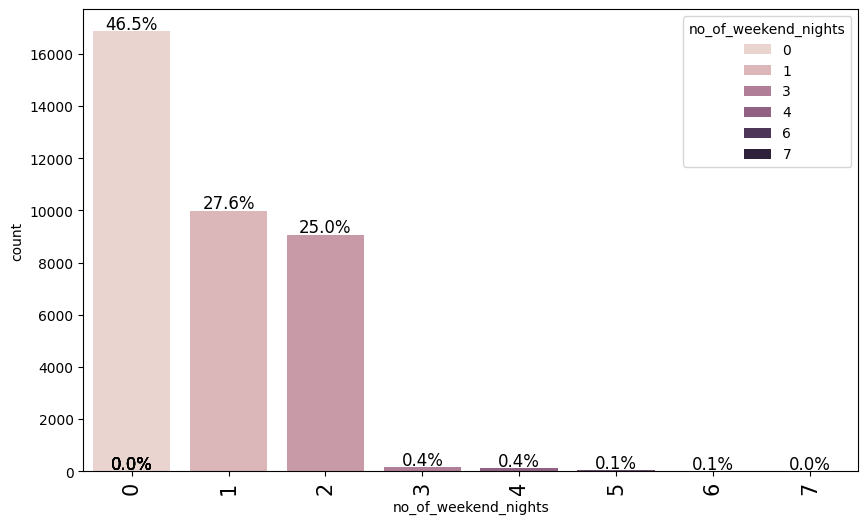

In [45]:
# Bar plot showing the percentage of bookings for each number of weekend nights.
labeled_barplot(data, 'no_of_weekend_nights', perc=True)

* 46.5% of bookings are for zero weekend nights, 27.6% are for one weekend night, and 25% are for two weekend nights.

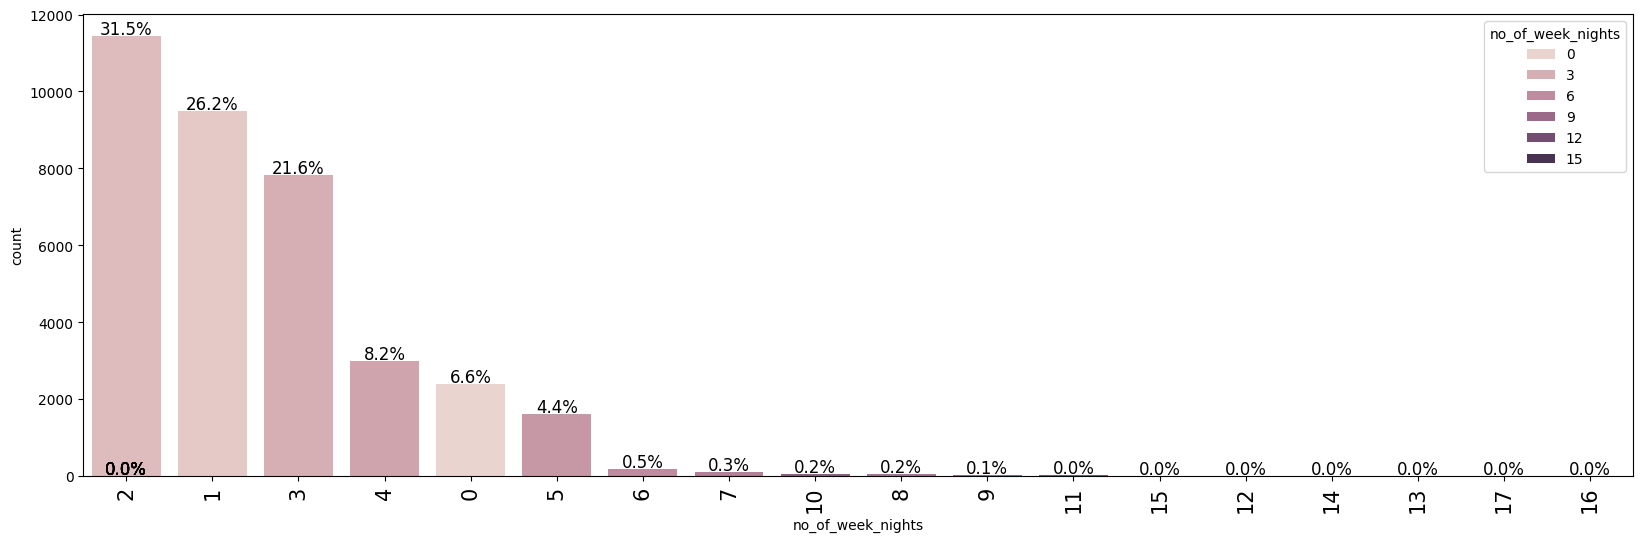

In [47]:
# Bar plot for showing the percentage of bookings for each number of week nights.
labeled_barplot(data, 'no_of_week_nights', perc=True)

* Most bookings are for between one and three nights, with two nights being the most common.

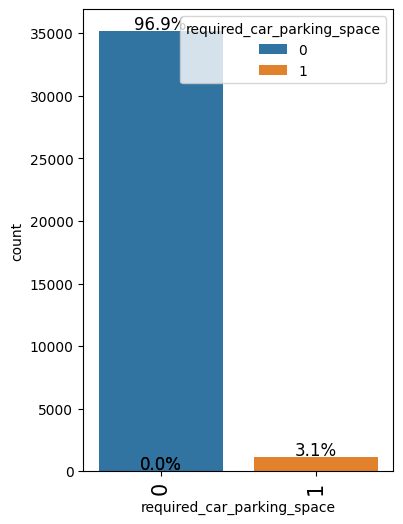

In [49]:
# Bar plot for showing the percentage of bookings reqiring car parking space.
labeled_barplot(data, "required_car_parking_space", perc=True)

* Only 3.1% of bookings are reqiring car parking space.

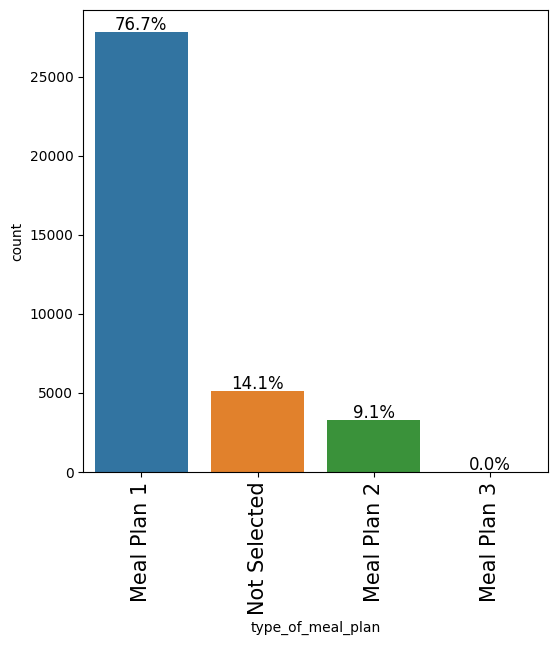

In [51]:
# Bar plot showing the percentage of bookings with different meal plans.
labeled_barplot(data, "type_of_meal_plan", perc=True)

* 76.7% of bookings selected Meal Plan 1, 9.1% selected Meal Plan 2, and the rest did not select a meal plan. Meal Plan 3 was almost never selected.

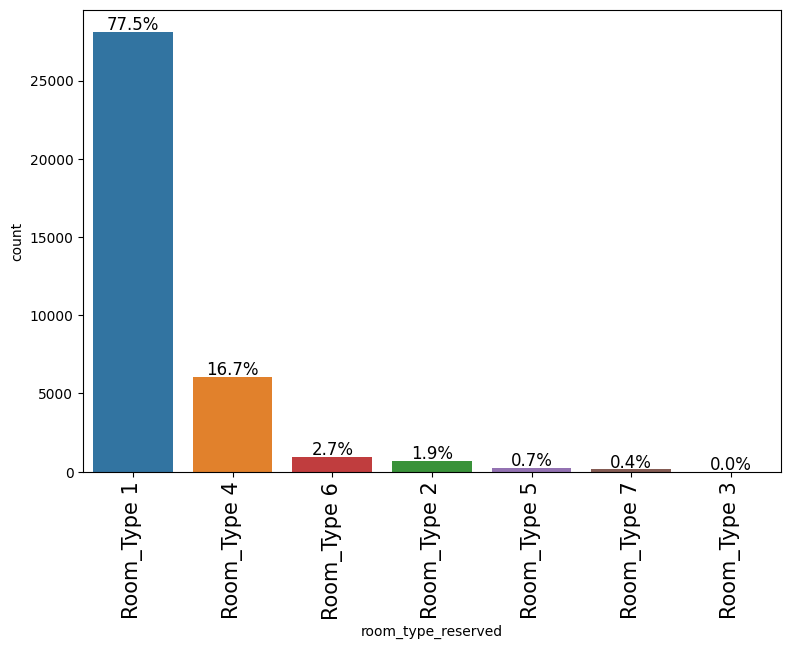

In [53]:
# Bar plot showing the percentage of bookings of different room types
labeled_barplot(data, "room_type_reserved", perc=True)

* Room Type 1 is the most popular, selected in 77.5% of bookings. Room Type 4 is the second most popular, selected in 16.7% of bookings. Other room types are less popular.

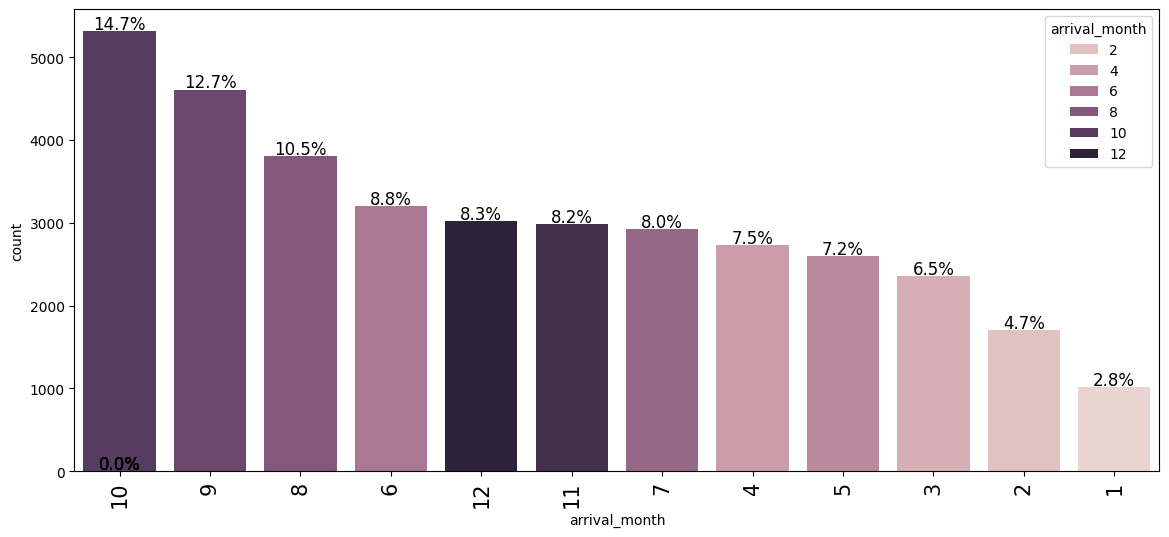

In [55]:
# Bar plot showing the percentage of bookings for each month of the year.
labeled_barplot(data, "arrival_month", perc=True)

* The busiest months for INN Hotels are October, September, and August. The least busy months are January, February, and March.

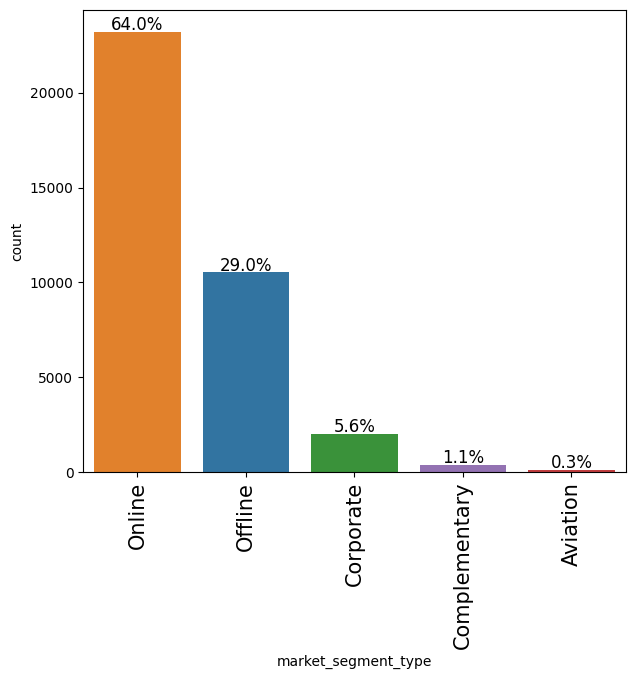

In [57]:
# Bar plot showing the percentage of bookings for different market segment type.
labeled_barplot(data, "market_segment_type", perc=True)

* The most common bookings are online, accounting for 64% of all bookings, followed by offline bookings at 29%, corporate bookings at 5.6%, and aviation bookings at 0.3%.
* Complimentary free rooms are represented in 1.1% of all bookings.

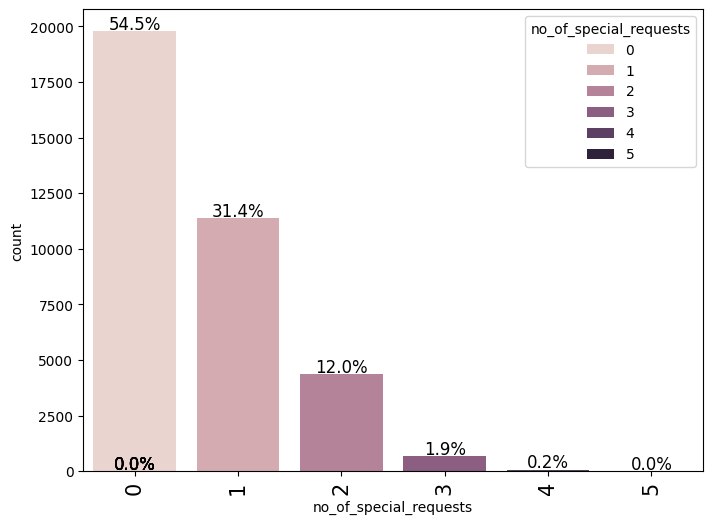

In [59]:
# Bar plot showing the percentage of bookings with number of special requests.
labeled_barplot(data, "no_of_special_requests", perc=True)

* 54.5% of bookings have no special requests. 31.4% have one special request, 12% have two special requests, and 1.9% have three special requests.

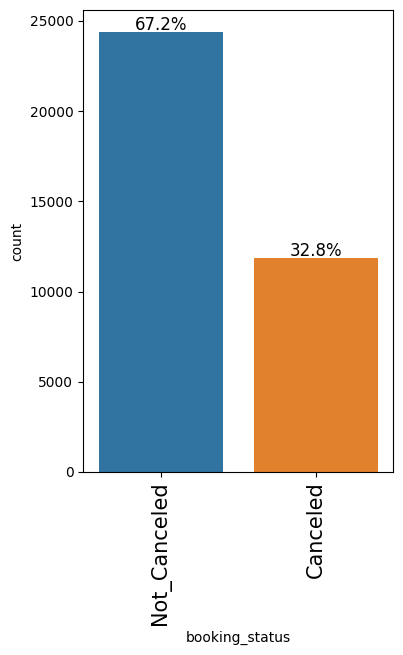

In [61]:
# Bar plot showing the percentage of booking status.
labeled_barplot(data, "booking_status", perc=True)

* 32.8% of bookings are canceled.

In [63]:
# Transforming categorical variables from object to integer to enable their use in modeling.
data["booking_status"] = data["booking_status"].apply(
    lambda x: 1 if x == "Canceled" else 0
)

### Bivariate Analysis

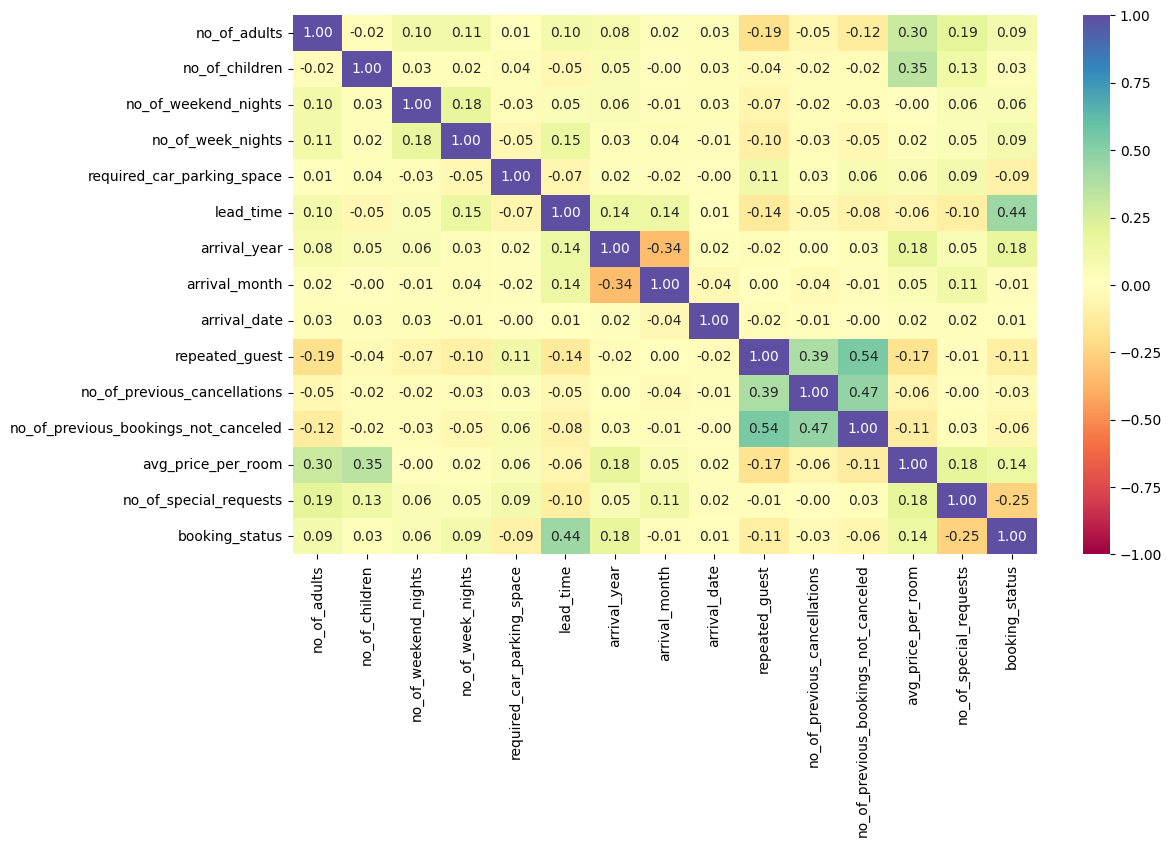

In [65]:
# Creating a list of numerical columns
cols_list = data.select_dtypes(include=np.number).columns.tolist()
# Creating a heatmap to check the correlation between different columns.
plt.figure(figsize=(12, 7))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

* The number of adults and the number of children are moderately positively correlated with the average price per room.
* Lead time is moderately positively correlated with booking status.
* Repeated guest is moderately positivety correlated with the number of previous cancellations and strongly correlated with the number of previous bookings not canceled.
* Other variables have no significant correlation.

In [67]:
# function to plot distributions wrt target

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0])

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
    )

    plt.tight_layout()
    plt.show()

In [68]:
# Fanction to plot stacked barplot

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

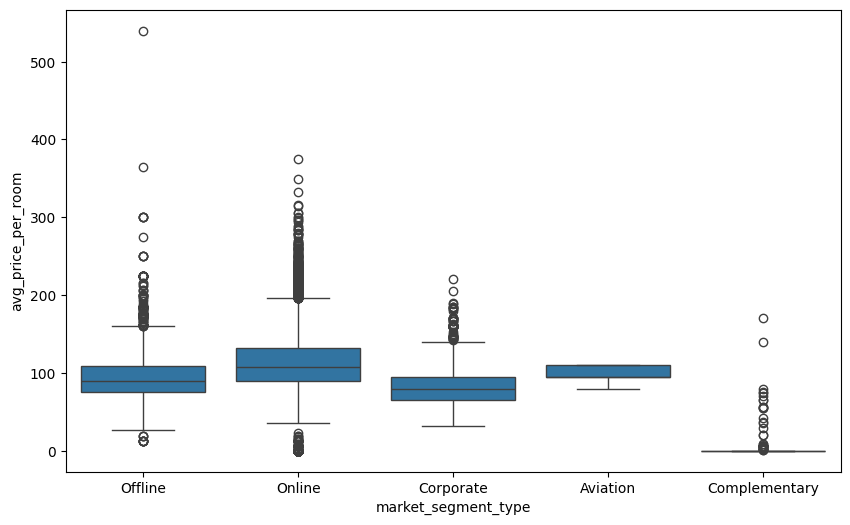

In [69]:
# Plotting a boxplot to compare the average price per room by market segment type

plt.figure(figsize=(10, 6))
sns.boxplot(
    data=data, x="market_segment_type", y="avg_price_per_room"
)
plt.show()

* The median online price appears to be the highest.
* The median price for complimentary rooms is zero, but there are some outliers, meaning not all complimentary rooms are priced at zero.
* The median price for the rest of the market segment types is similar and appears to be approximately between 90 and 110.

booking_status           0      1    All
market_segment_type                     
All                  24390  11885  36275
Online               14739   8475  23214
Offline               7375   3153  10528
Corporate             1797    220   2017
Aviation                88     37    125
Complementary          391      0    391
------------------------------------------------------------------------------------------------------------------------


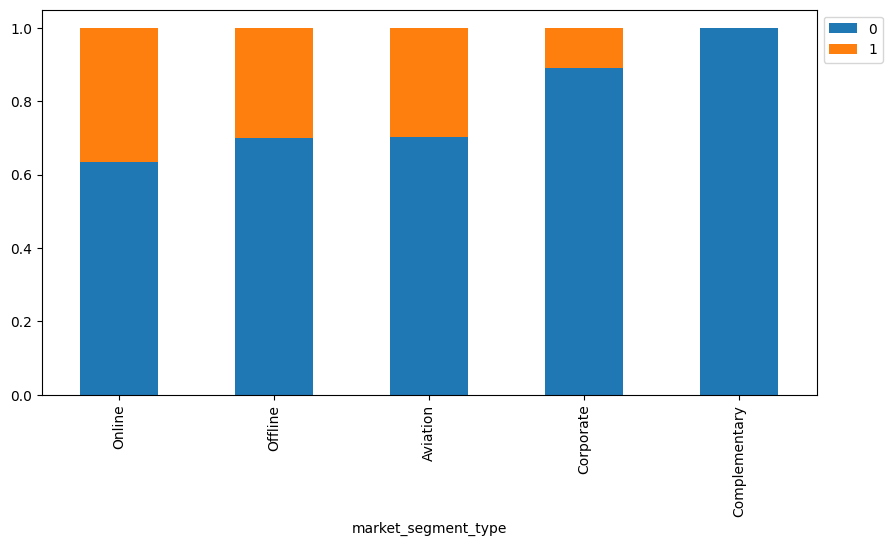

In [71]:
# Plotting a stacked barplot for market segment type and booking status
stacked_barplot(data, "market_segment_type", "booking_status")

* From the visualization above, it appears that the highest rate of cancellations comes from online bookings.
* Complimentary bookings have no cancellations.

booking_status              0      1    All
no_of_special_requests                     
All                     24390  11885  36275
0                       11232   8545  19777
1                        8670   2703  11373
2                        3727    637   4364
3                         675      0    675
4                          78      0     78
5                           8      0      8
------------------------------------------------------------------------------------------------------------------------


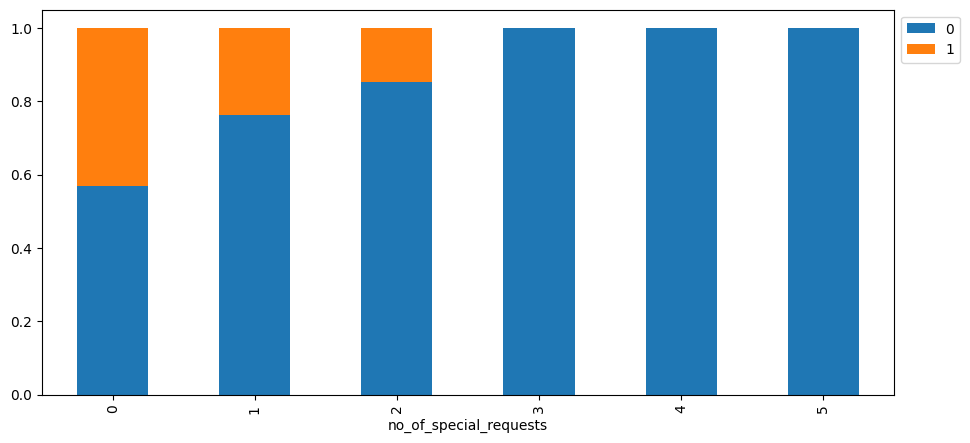

In [73]:
# Plotting a stacked barplot for number of special requests and booking status
stacked_barplot(data, "no_of_special_requests", "booking_status")

* From visualization above we can see that guests with spetial reqirements are less likely to cancel booking

<Axes: xlabel='no_of_special_requests', ylabel='avg_price_per_room'>

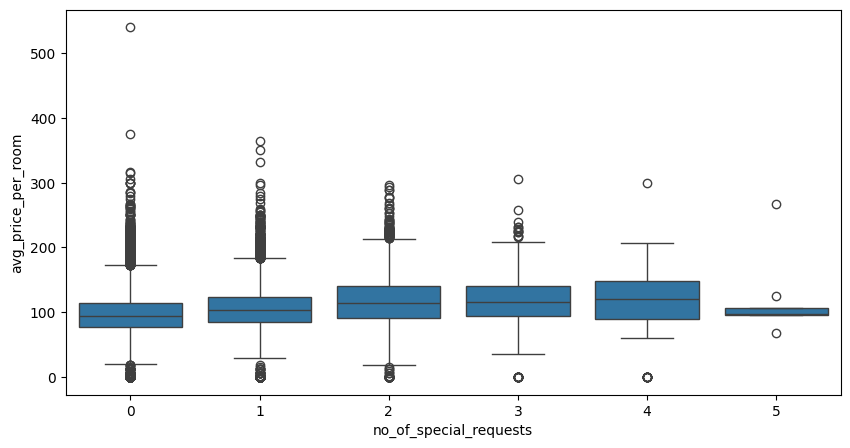

In [75]:
#Plotting a boxplot to visualize how the average price per room is affected by the number of special requests.
plt.figure(figsize=(10, 5))
sns.boxplot(data, x="no_of_special_requests", y="avg_price_per_room")

* From the visualization above, it appears that the more special requests there are, the higher the price for the room.

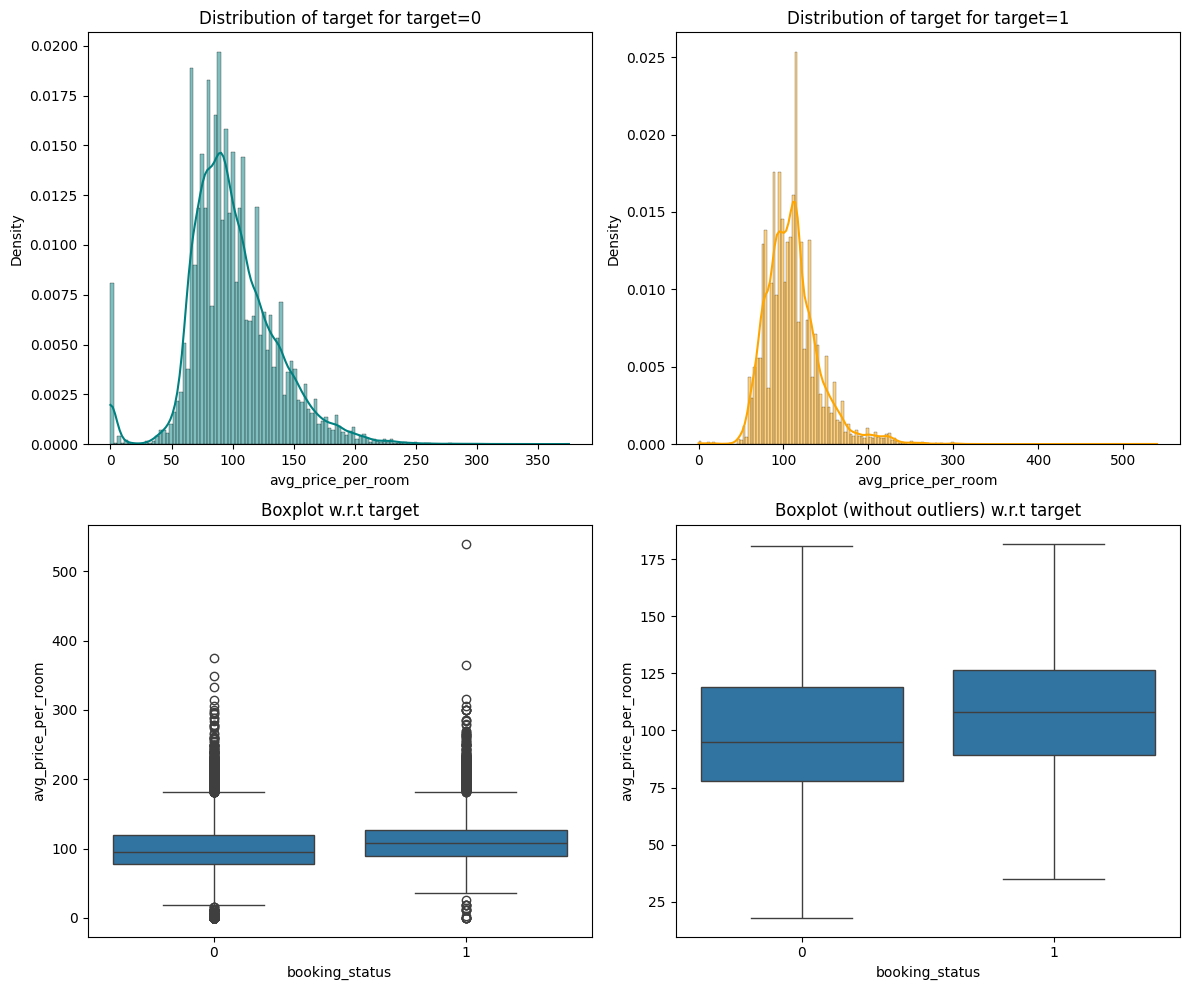

In [77]:
# Distribution plot for average price per room and booking status
distribution_plot_wrt_target(data, "avg_price_per_room", "booking_status")

* Canceled bookings have a higher median price per room.

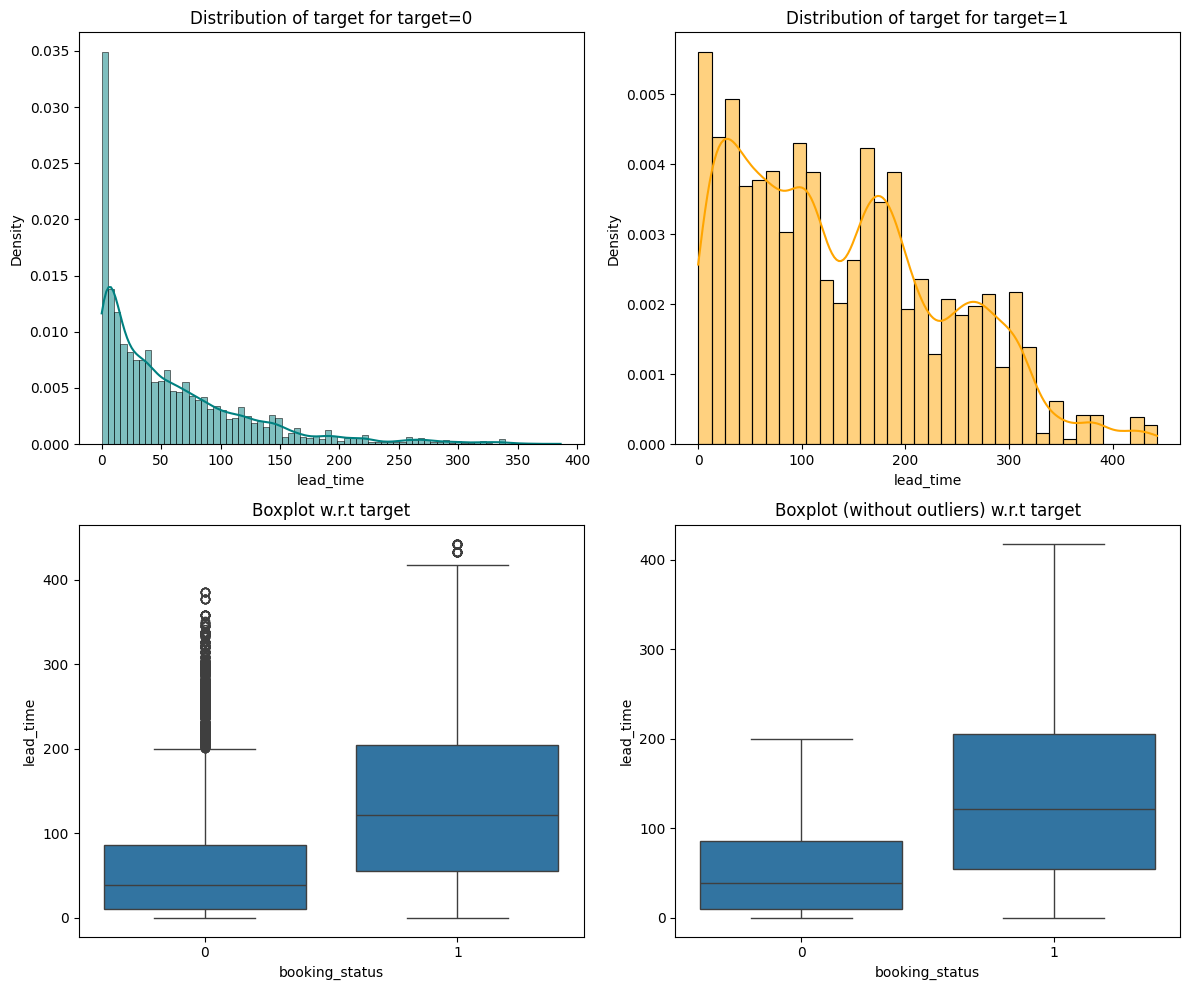

In [79]:
# Distribution plot for lead time and booking status
distribution_plot_wrt_target(data, "lead_time", "booking_status")

* Canceled bookings have a higher median lead time compared to non-canceled bookings

In [81]:
# Creating filtered dataset for customers with children
family_data = data[(data["no_of_children"] >= 0) & (data["no_of_adults"] > 1)].copy()
family_data.shape

(28441, 18)

* There are 28,441 rows and 18 columns in the filtered dataset for customers with children.

In [83]:
# Adding new column with number of family members to the new dataset
family_data["no_of_family_members"] = (
    family_data["no_of_adults"] + family_data["no_of_children"]
)

booking_status            0     1    All
no_of_family_members                    
All                   18456  9985  28441
2                     15506  8213  23719
3                      2425  1368   3793
4                       514   398    912
5                        11     6     17
------------------------------------------------------------------------------------------------------------------------


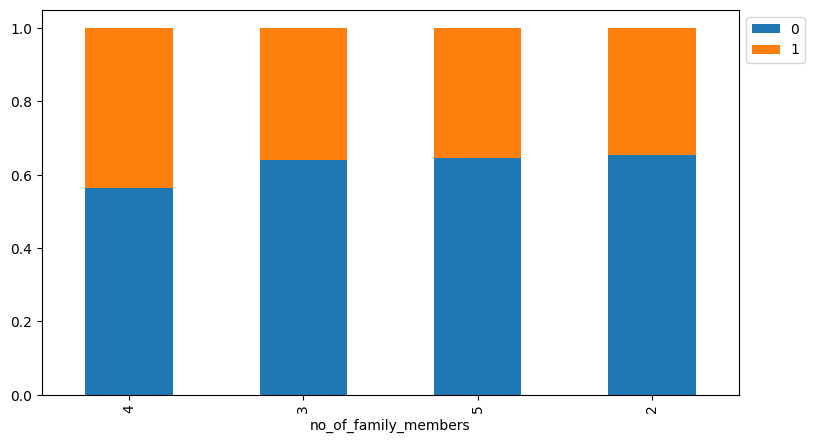

In [84]:
# Plotting a stacked barplot for number of family members and booking status
stacked_barplot(family_data, "no_of_family_members", "booking_status")

* Number of family members have no significant effect on cancelations.

In [86]:
# Creating filtered dataset for customers who stayed a least one day at the hotel
stay_data = data[(data["no_of_week_nights"] > 0) & (data["no_of_weekend_nights"] > 0)].copy()
stay_data.shape

(17094, 18)

In [87]:
# Creating new column with total days stayed in the new stay data dataset
stay_data["total_days"] = (
    stay_data["no_of_week_nights"] + stay_data["no_of_weekend_nights"]
)

booking_status      0     1    All
total_days                        
All             10979  6115  17094
3                3689  2183   5872
4                2977  1387   4364
5                1593   738   2331
2                1301   639   1940
6                 566   465   1031
7                 590   383    973
8                 100    79    179
10                 51    58    109
9                  58    53    111
14                  5    27     32
15                  5    26     31
13                  3    15     18
12                  9    15     24
11                 24    15     39
20                  3     8     11
19                  1     5      6
16                  1     5      6
17                  1     4      5
18                  0     3      3
21                  1     3      4
22                  0     2      2
23                  1     1      2
24                  0     1      1
------------------------------------------------------------------------------------------

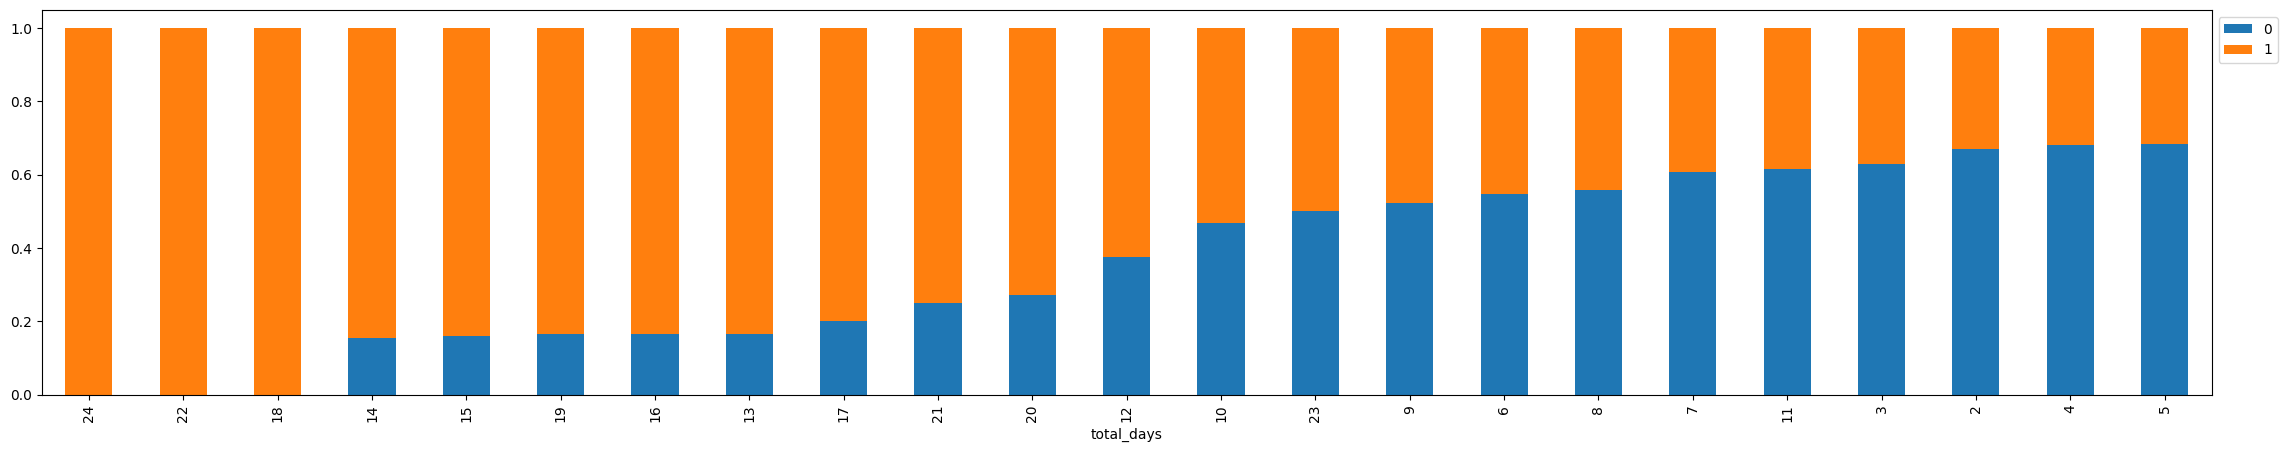

In [88]:
# Stacked barplot for total days and booking status
stacked_barplot(stay_data, "total_days", "booking_status")

* It appears that bookings with a higher total number of stay days have a greater tendency to be canceled.

booking_status      0     1    All
repeated_guest                    
All             10979  6115  17094
0               10812  6108  16920
1                 167     7    174
------------------------------------------------------------------------------------------------------------------------


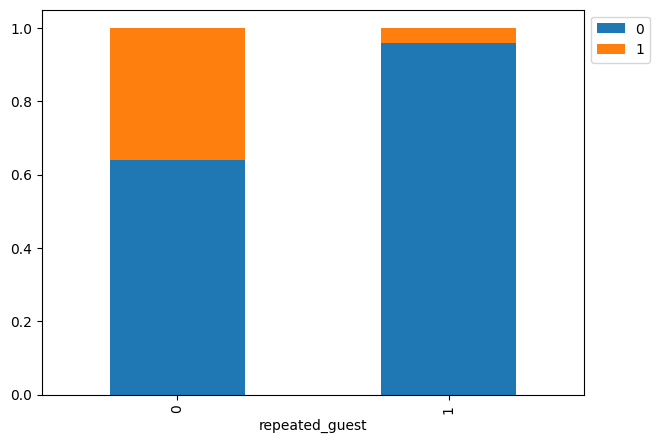

In [90]:
# Stacked barplot for reapeted guest and booking status
stacked_barplot(stay_data, "repeated_guest", "booking_status")

* Repeated guests are less likely to cancel.

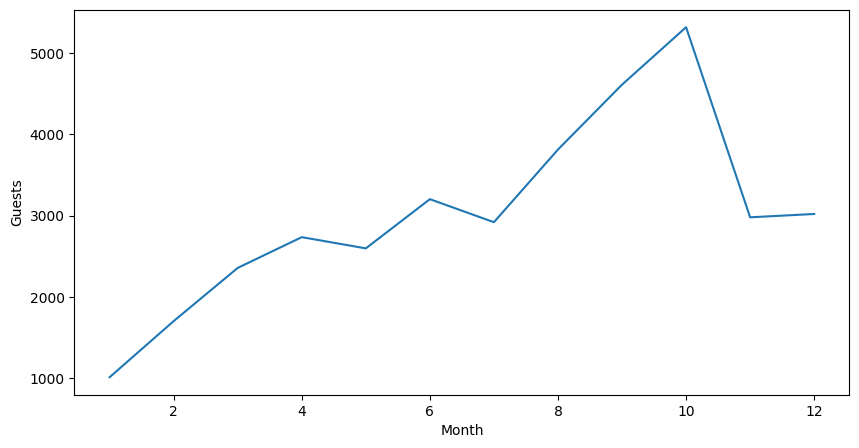

In [92]:
# grouping the data on arrival months and extracting the count of bookings
monthly_data = data.groupby(["arrival_month"])["booking_status"].count()

# creating a dataframe with months and count of customers in each month
monthly_data = pd.DataFrame(
    {"Month": list(monthly_data.index), "Guests": list(monthly_data.values)}
)

# plotting the trend over different months
plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_data, x="Month", y="Guests")
plt.show()

* From the graph above, we can see that the busiest months are August, September, and October.

##### Let's see which month has the most cancellations.

booking_status      0      1    All
arrival_month                      
All             24390  11885  36275
10               3437   1880   5317
9                3073   1538   4611
8                2325   1488   3813
7                1606   1314   2920
6                1912   1291   3203
4                1741    995   2736
5                1650    948   2598
11               2105    875   2980
3                1658    700   2358
2                1274    430   1704
12               2619    402   3021
1                 990     24   1014
------------------------------------------------------------------------------------------------------------------------


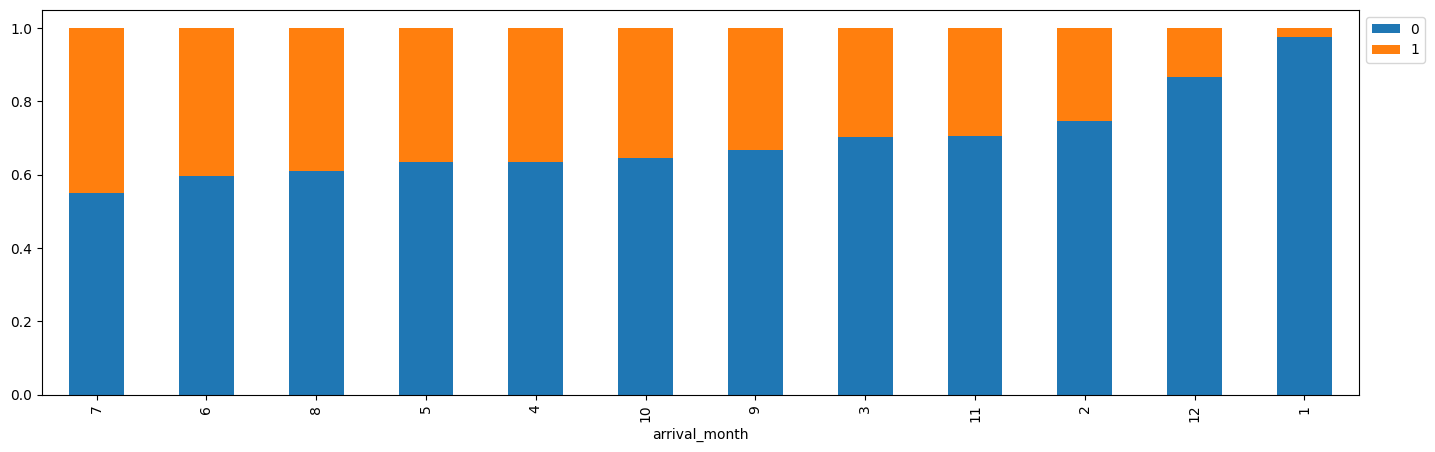

In [95]:
# Stacked barplot for arrival month and booking status
stacked_barplot(data, "arrival_month", "booking_status")

* From the graph above, we can see that summer months have the highest cancellation rates, while winter months have the lowest cancellation rates.

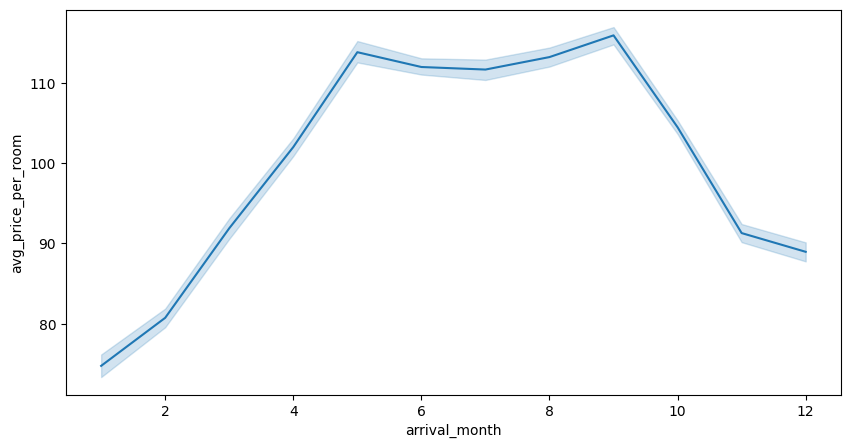

In [97]:
# Creating lineplot between average price per room and arrival month
plt.figure(figsize=(10, 5))
sns.lineplot(data, x='arrival_month', y='avg_price_per_room')
plt.show()

* From the graph above, we can see that the highest prices are from May to September.

### Data Preprocessing


#### Let's look into data outliers

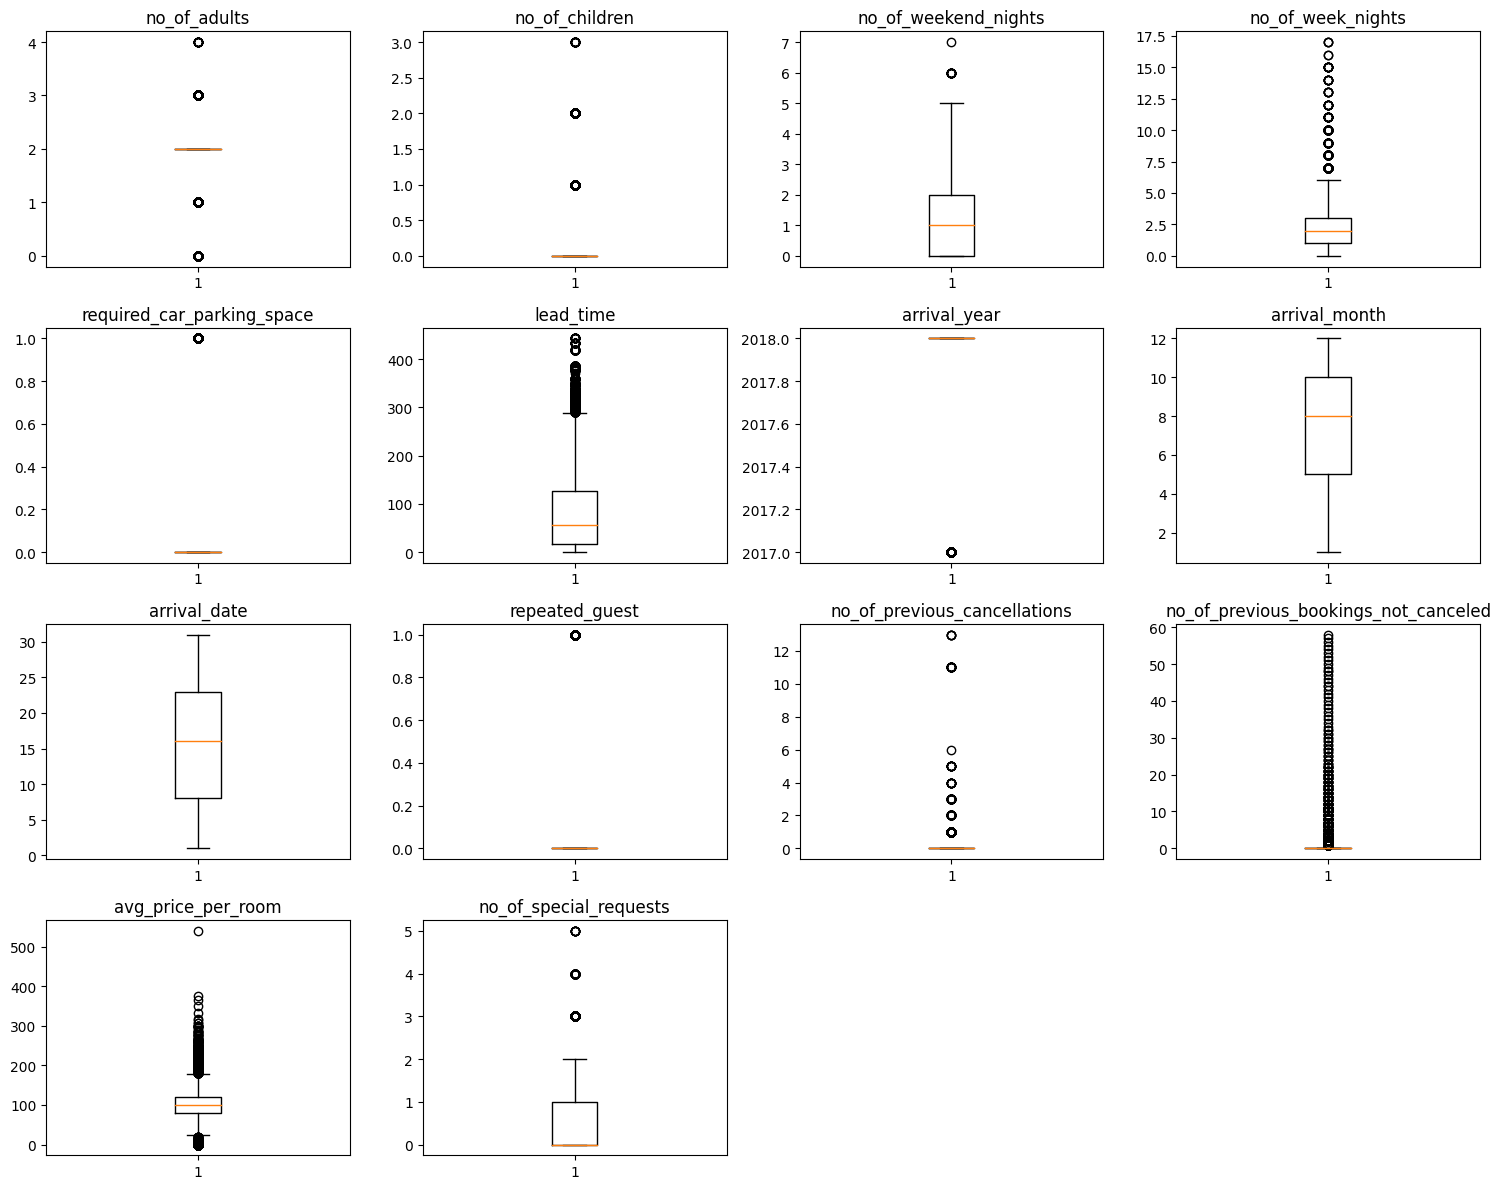

In [101]:
# outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()
# dropping booking_status
numeric_columns.remove("booking_status")

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

* We will not treat the outliers, as they are all real data and should be included in our model building.

#### Preparation for Modeling

In [104]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [105]:
# defining a function to plot the confusion_matrix of a classification model


def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [106]:
# splitting the dataset into dependent (target) and independent (feature) variables for ml model
X = data.drop(["booking_status"], axis=1)
Y = data["booking_status"]

# adding constant
X = sm.add_constant(X) 
# to convert categorical variables to dummy variables
X = pd.get_dummies(X, drop_first=True) 

# splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [107]:
# Printing the shape of the training and test data after the split
# Printing the percentage of classes in the training and test data after the split
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25392, 28)
Shape of test set :  (10883, 28)
Percentage of classes in training set:
0   0.671
1   0.329
Name: booking_status, dtype: float64
Percentage of classes in test set:
0   0.676
1   0.324
Name: booking_status, dtype: float64


* Percentage of classes are very close. We can proceed to model building

### Building a Logistic Regression model

In [110]:
# fitting logistic regression model
logit = sm.Logit(y_train, X_train.astype(float))
lg = logit.fit(disp=False) 

print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25364
Method:                           MLE   Df Model:                           27
Date:                Sat, 24 Aug 2024   Pseudo R-squ.:                  0.3293
Time:                        00:33:35   Log-Likelihood:                -10793.
converged:                      False   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 -923.2807    120.833     -7.641      0.000   -1160.110    -686.452
no_of_adults                             0.1136      

**Observations**

- Negative values of the coefficient show that the probability of cancelation decreases with the increase of the corresponding attribute value.

- Positive values of the coefficient show that the probability not cancelation increases with the increase of the corresponding attribute value.

- p-value of a variable indicates if the variable is significant or not. If we consider the significance level to be 0.05 (5%), then any variable with a p-value less than 0.05 would be considered significant.

In [112]:
# Chekcing the model performance 
print("Training performance:")
model_performance_classification_statsmodels(lg, X_train, y_train)

Training performance:


,Accuracy,Recall,Precision,F1
0,0.806,0.634,0.740,0.683


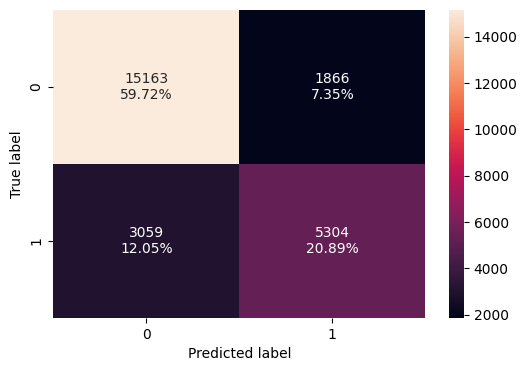

In [113]:
# Checking confusion matrix
confusion_matrix_statsmodels(lg, X_train, y_train)

**Observations**

- The f1_score of the model is ~0.68 and we will try to maximize it further

- The variables used to build the model might contain multicollinearity, which will affect the p-values

* We will have to remove multicollinearity from the data to get reliable coefficients and p-values

#### Checking Multicollinearity

- In order to make statistical inferences from a logistic regression model, it is important to ensure that there is no multicollinearity present in the data.

In [116]:
# We'll check for multicollinearity with Variance  Inflation Factor (VIF)

vif_series = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
    dtype=float,
)
print("Series before feature selection: \n\n{}\n".format(vif_series))

Series before feature selection: 

const                                  39474810.786
no_of_adults                                  1.351
no_of_children                                2.093
no_of_weekend_nights                          1.069
no_of_week_nights                             1.096
required_car_parking_space                    1.040
lead_time                                     1.395
arrival_year                                  1.431
arrival_month                                 1.276
arrival_date                                  1.007
repeated_guest                                1.783
no_of_previous_cancellations                  1.396
no_of_previous_bookings_not_canceled          1.652
avg_price_per_room                            2.055
no_of_special_requests                        1.248
type_of_meal_plan_Meal Plan 2                 1.272
type_of_meal_plan_Meal Plan 3                 1.025
type_of_meal_plan_Not Selected                1.273
room_type_reserved_Room_Type 

* If VIF exceeds 5, we say there is moderate multicollinearity, and we need to remove that featers.

* Multicollinearity is present in the data.
* We will drop the feature with the highest VIF and check again.

In [119]:
X_train1 = X_train.drop("market_segment_type_Online", axis=1)

vif_series2 = pd.Series(
    [variance_inflation_factor(X_train1.values, i) for i in range(X_train1.shape[1])],
    index=X_train1.columns,
)
print("Series before feature selection: \n\n{}\n".format(vif_series2))

Series before feature selection: 

const                                  39397627.644
no_of_adults                                  1.334
no_of_children                                2.092
no_of_weekend_nights                          1.069
no_of_week_nights                             1.095
required_car_parking_space                    1.040
lead_time                                     1.391
arrival_year                                  1.429
arrival_month                                 1.275
arrival_date                                  1.007
repeated_guest                                1.780
no_of_previous_cancellations                  1.395
no_of_previous_bookings_not_canceled          1.652
avg_price_per_room                            2.054
no_of_special_requests                        1.243
type_of_meal_plan_Meal Plan 2                 1.272
type_of_meal_plan_Meal Plan 3                 1.025
type_of_meal_plan_Not Selected                1.271
room_type_reserved_Room_Type 

* Multicollinearity is treated.
* No more VIF is higher then 5

In [121]:
# fitting logistic regression model
logit2 = sm.Logit(y_train, X_train1.astype(float))
lg2 = logit2.fit(disp=False) 

print(lg2.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25365
Method:                           MLE   Df Model:                           26
Date:                Sat, 24 Aug 2024   Pseudo R-squ.:                  0.3292
Time:                        00:33:37   Log-Likelihood:                -10794.
converged:                      False   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 -932.0589    120.670     -7.724      0.000   -1168.568    -695.549
no_of_adults                             0.1061      

In [122]:
# Chekcing the model performance 
print("Training performance:")
model_performance_classification_statsmodels(lg2, X_train1, y_train)

Training performance:


,Accuracy,Recall,Precision,F1
0,0.806,0.634,0.739,0.682


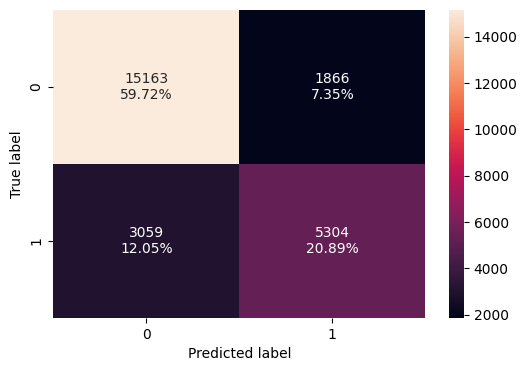

In [123]:
# Checking confusion matrix
confusion_matrix_statsmodels(lg, X_train, y_train)

* There is a very small difference in model performance after addressing multicollinearity.

##### We also have features with high p-values, which we will drop one by one using a loop function.

In [126]:
# initial list of columns
cols = X_train1.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    X_train_aux = X_train1[cols]

    # fitting the model
    model = sm.Logit(y_train, X_train_aux).fit(disp=False)

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'repeated_guest', 'no_of_previous_cancellations', 'avg_price_per_room', 'no_of_special_requests', 'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'market_segment_type_Corporate', 'market_segment_type_Offline']


In [127]:
X_train2 = X_train1[selected_features]
X_test1 = X_test[selected_features]

In [128]:
logit3 = sm.Logit(y_train, X_train2.astype(float))

lg3 = logit3.fit(disp=False) 

print(lg3.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25370
Method:                           MLE   Df Model:                           21
Date:                Sat, 24 Aug 2024   Pseudo R-squ.:                  0.3283
Time:                        00:33:38   Log-Likelihood:                -10809.
converged:                       True   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           -916.0557    120.472     -7.604      0.000   -1152.176    -679.935
no_of_adults                       0.1087      0.037      2.911      0.

In [129]:
print("Training performance:")
model_performance_classification_statsmodels(lg3, X_train2, y_train) ## Complete the code to check performance on X_train1 and y_train

Training performance:


,Accuracy,Recall,Precision,F1
0,0.805,0.633,0.739,0.682


* The model performance almost didn't change after removing features with p-values greater than 0.05.
* Now no categorical feature has p-value greater than 0.05, so we'll consider the features in *X_train2* as the final ones and *lg3* as final model.

#### Coefficient Interpretations
* Coefficient of no_of_adults, no_of_weekend_nights, and no_of_previous_cancellations are positive an increase in these will lead to increase in chances of a booking cancelation.

* Coefficient of repeated_guest, no_of_special_requests, required_car_parking_space or market_segment_type_Offline are negative. Increase in these will lead to decrease in chances booking cancelation.

**Converting coefficients to odds**

* The coefficients ($\beta$s) of the logistic regression model are in terms of $log(odds)$ and to find the odds, we have to take the exponential of the coefficients
* Therefore, **$odds =  exp(\beta)$**
* The percentage change in odds is given as $(exp(\beta) - 1) * 100$

In [133]:
# converting coefficients to odds
odds = np.exp(lg3.params)

# finding the percentage change
perc_change_odds = (np.exp(lg3.params) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train2.columns).T

,const,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,repeated_guest,no_of_previous_cancellations,avg_price_per_room,no_of_special_requests,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Corporate,market_segment_type_Offline
Odds,0.000,1.115,1.166,1.115,1.043,0.203,1.016,1.572,0.959,0.065,1.257,1.019,0.230,1.180,1.331,0.701,0.754,0.479,0.380,0.239,0.453,0.168
Change_odd%,-100.000,11.480,16.576,11.479,4.262,-79.697,1.583,57.228,-4.150,-93.526,25.723,1.934,-77.003,17.983,33.096,-29.920,-24.579,-52.069,-61.960,-76.111,-54.677,-83.248


**Coefficient interpretations**

* `no_of_adults	`: Holding all other features constant a 1 unit change in no_of_adults will increase the odds booking cancelation by ~11.5%
* `required_car_parking_space`: Holding all other features constant a 1 unit change in the required_car_parking_space will decrease the odds of cancelation by ~0.2 times or a decrease of ~80%.
* `lead_time`: Holding all other features constant a 1 unit change in the lead_time will increase the odds of cancelation by ~1.01 times or a increase of ~1.58%.

**Interpretation for other attributes can be done similarly.**

## Model performance evaluation

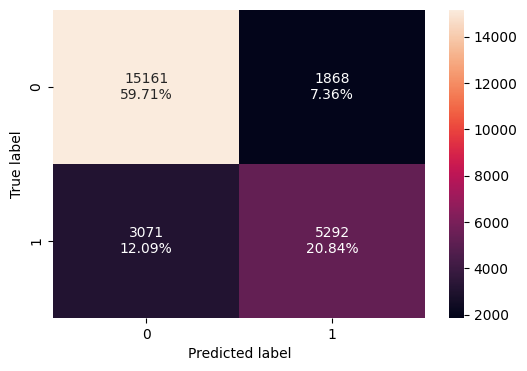

In [136]:
# creating confusion matrix
confusion_matrix_statsmodels(lg3, X_train2, y_train)

In [137]:
# Checking model performance
print("Training performance:")
log_reg_model_train_perf = model_performance_classification_statsmodels(lg3, X_train2, y_train)
log_reg_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.805,0.633,0.739,0.682


**Test set performance**

- We have to first drop the columns from the test set that were dropped from the training set.

In [139]:
X_test2 = X_test[list(X_train2.columns)]

In [140]:
log_reg_model_test_perf = model_performance_classification_statsmodels(
    lg3, X_test2, y_test
)

print("Test performance:")
log_reg_model_test_perf

Test performance:


,Accuracy,Recall,Precision,F1
0,0.805,0.631,0.729,0.677


- The model is giving f1_score of ~0.0.682 and ~0.0.677 on the train and test sets respectively
- As the train and test performances are comparable, the model is not overfitting
- Moving forward we will try to improve the performance of the model

### Model Performance Improvement
* Let's see if the f1_score can be improved further by changing the model threshold
* First, we will check the ROC curve, compute the area under the ROC curve (ROC-AUC), and then use it to find the optimal threshold
* Next, we will check the Precision-Recall curve to find the right balance between precision and recall as our metric of choice is f1_score

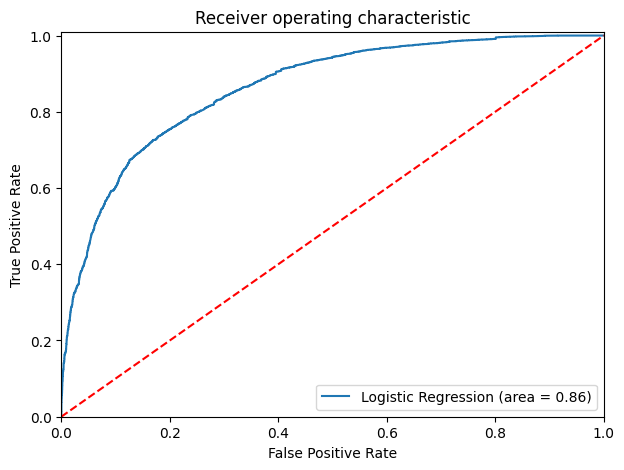

In [143]:
# ROC-AUC on training set
logit_roc_auc_train = roc_auc_score(y_train, lg3.predict(X_train2))
fpr, tpr, thresholds = roc_curve(y_train, lg3.predict(X_train2))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

* Logistic Regression model is giving a good performance on training set.

In [145]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, lg3.predict(X_train2))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.37112356478225433


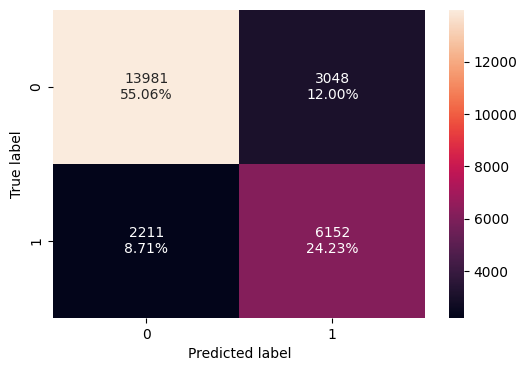

In [146]:
# Checking model performance on training set by creating confusion matrix
confusion_matrix_statsmodels(
    lg3, X_train2, y_train, threshold=optimal_threshold_auc_roc
)

In [147]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg3, X_train2, y_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


,Accuracy,Recall,Precision,F1
0,0.793,0.736,0.669,0.701


* We improved the F1 wich gives us more balanced model but some other metrics decresed.
* The model is still giving a good performance

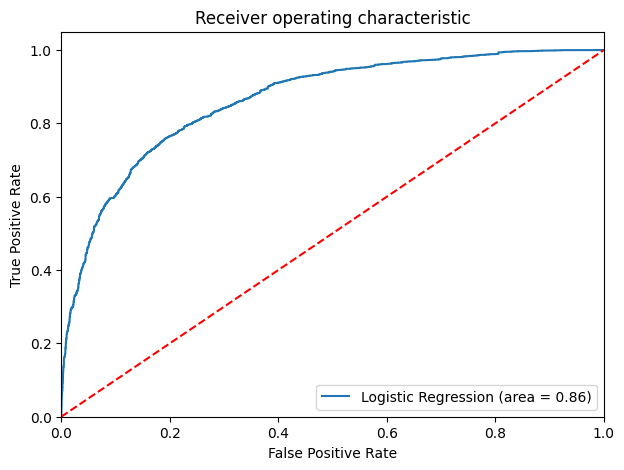

In [149]:
# Checking model performance on test set
logit_roc_auc_train = roc_auc_score(y_test, lg3.predict(X_test2))
fpr, tpr, thresholds = roc_curve(y_test, lg3.predict(X_test2))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

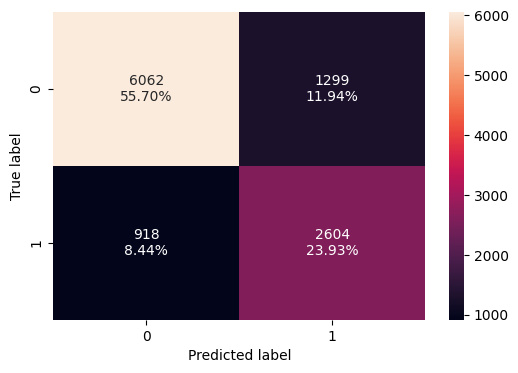

In [150]:
# creating confusion matrix
confusion_matrix_statsmodels(lg3, X_test2, y_test, threshold=optimal_threshold_auc_roc)

In [151]:
# checking model performance for this model
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg3, X_test2, y_test, threshold=optimal_threshold_auc_roc
)
print("Test performance:")
log_reg_model_test_perf_threshold_auc_roc

Test performance:


,Accuracy,Recall,Precision,F1
0,0.796,0.739,0.667,0.701


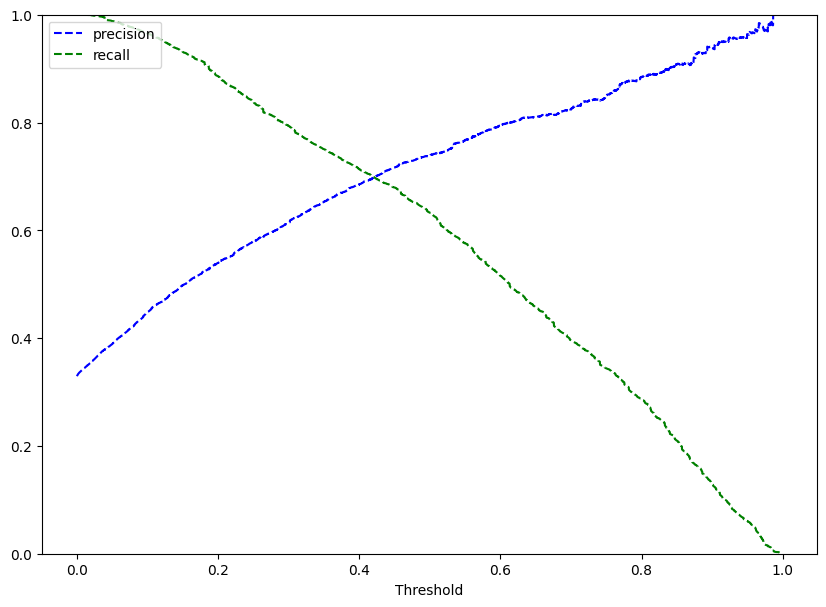

In [152]:
# Checking Precision-Recall Curve
y_scores = lg3.predict(X_train2)
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

* Graph shows that the optimal threshold is approximately equal to 0.42

In [154]:
# setting the threshold
optimal_threshold_curve = 0.42

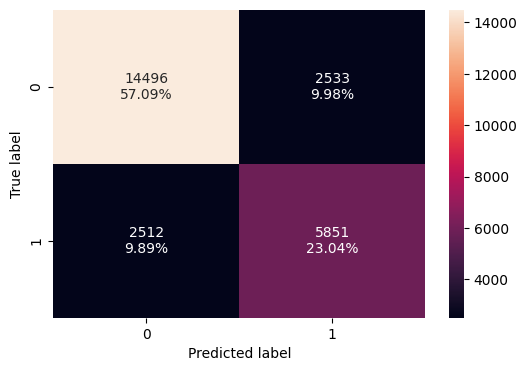

In [155]:
# creating confusion matrix
confusion_matrix_statsmodels(lg3, X_train2, y_train, threshold=optimal_threshold_curve)

In [156]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_statsmodels(
    lg3, X_train2, y_train, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


,Accuracy,Recall,Precision,F1
0,0.801,0.700,0.698,0.699


* We have a balanced model that predicts comparable values for false positives (FP) and false negatives (FN) on the training set.

### Lets check model performance on the test set

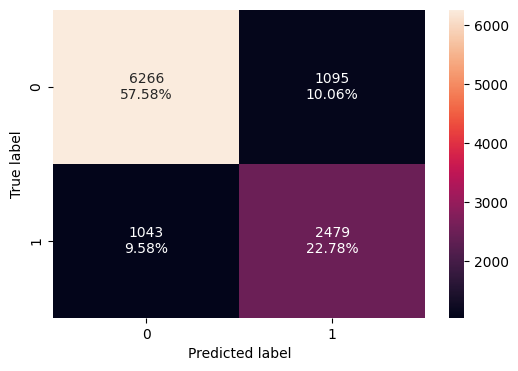

In [159]:
# creating confusion matrix
confusion_matrix_statsmodels(lg3, X_test2, y_test, threshold=optimal_threshold_curve)

In [160]:
log_reg_model_test_perf_threshold_curve = model_performance_classification_statsmodels(
    lg3, X_test2, y_test, threshold=optimal_threshold_curve
)
print("Test performance:")
log_reg_model_test_perf_threshold_curve

Test performance:


,Accuracy,Recall,Precision,F1
0,0.804,0.704,0.694,0.699


## Final Model Summary

In [162]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression-default Threshold",
    "Logistic Regression-0.37 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression-default Threshold,Logistic Regression-0.37 Threshold,Logistic Regression-0.42 Threshold
Accuracy,0.805,0.793,0.801
Recall,0.633,0.736,0.700
Precision,0.739,0.669,0.698
F1,0.682,0.701,0.699


In [163]:
# test performance comparison

 ## Complete the code to compare test performance

models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression-default Threshold",
    "Logistic Regression-0.37 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Logistic Regression-default Threshold,Logistic Regression-0.37 Threshold,Logistic Regression-0.42 Threshold
Accuracy,0.805,0.796,0.804
Recall,0.631,0.739,0.704
Precision,0.729,0.667,0.694
F1,0.677,0.701,0.699


* The models are performing well on the test data without overfitting.
* The model with the threshold 0.37 is giving the best F1 score. Therefore it can be selected as the final model

## Building a Decision Tree model

In [166]:
# splitting the dataset into dependent (target) and independent (feature) variables for ml model
X = data.drop(["booking_status"], axis=1)
Y = data["booking_status"]

# encoding the categorical variables
X = pd.get_dummies(X, drop_first=True)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [167]:
# Chcking the shape of train and test data
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)

Shape of Training set :  (25392, 27)
Shape of test set :  (10883, 27)


In [168]:
# Checking the percentage of classes in train and test data
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Percentage of classes in training set:
0   0.671
1   0.329
Name: booking_status, dtype: float64
Percentage of classes in test set:
0   0.676
1   0.324
Name: booking_status, dtype: float64


In [169]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [170]:
# Function for confusion matrix
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [171]:
model = DecisionTreeClassifier(criterion="gini", random_state=1)
model.fit(X_train, y_train) ## Complete the code to fit decision tree on train data

DecisionTreeClassifier(random_state=1)

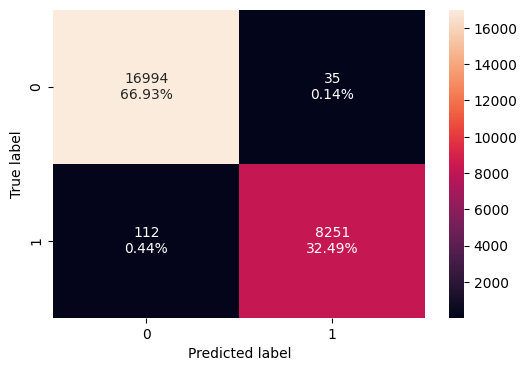

In [172]:
# createing confusion matrix for train data
confusion_matrix_sklearn(model, X_train, y_train)

In [173]:
# Checking Performance on the train data
decision_tree_perf_train = model_performance_classification_sklearn(
    model, X_train, y_train
)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,0.994,0.987,0.996,0.991


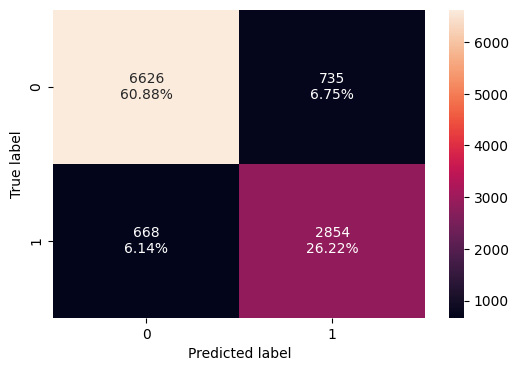

In [174]:
# createing confusion matrix for test data
confusion_matrix_sklearn(model, X_test, y_test) ## Complete the code to create confusion matrix for test data

In [175]:
# Checking Performance on the test data
decision_tree_perf_test = model_performance_classification_sklearn(model, X_test, y_test) ## Complete the code to check performance on test set
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.871,0.810,0.795,0.803


* All performance metrics on the training set are very high, but not so on the test data which means the model is overfitting.

**Before pruning the tree let's check the important features.**

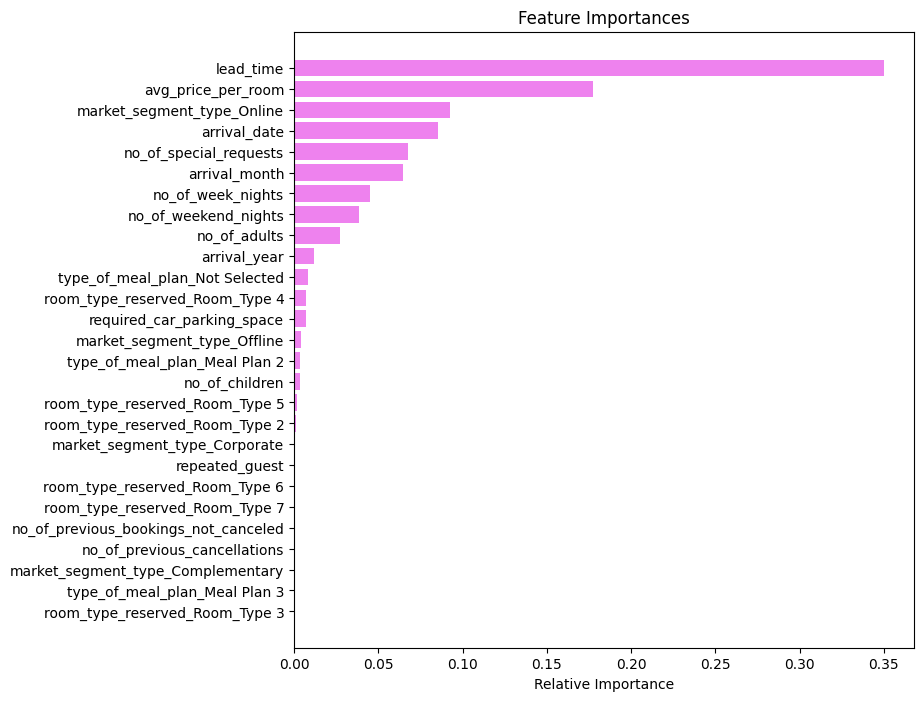

In [178]:
# Checking feature impotance
feature_names = list(X_train.columns)
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* Three most important features are lead time, avg price per room and market segment type Online

* The training model is overfitting, we need to prune the decision tree.

### Pre-Pruning

In [183]:
## Pre-Pruning the tree
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1, class_weight="balanced")

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(2, 7, 2),
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [10, 30, 50, 70],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(f1_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=6, max_leaf_nodes=50,
                       min_samples_split=10, random_state=1)

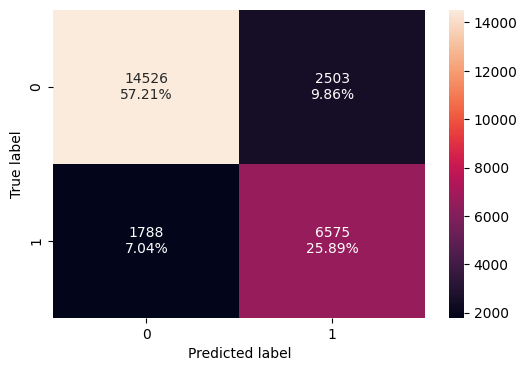

In [184]:
# creating confusion matrix for train data
confusion_matrix_sklearn(estimator, X_train, y_train)

In [185]:
# Checking performance on the train data
decision_tree_tune_perf_train = model_performance_classification_sklearn(estimator, X_train, y_train) ## Complete the code to check performance on train set
decision_tree_tune_perf_train

,Accuracy,Recall,Precision,F1
0,0.831,0.786,0.724,0.754


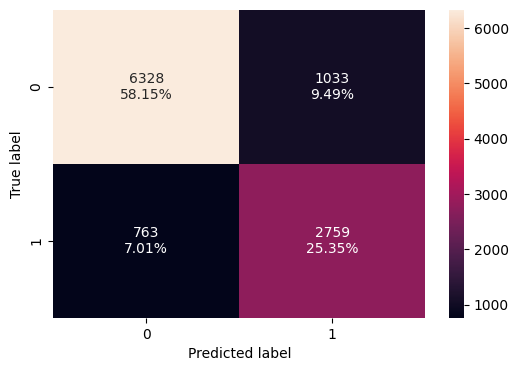

In [186]:
# creating confusion matrix for test data
confusion_matrix_sklearn(estimator, X_test, y_test)

In [187]:
# Checking performance on the test data
decision_tree_tune_perf_test = model_performance_classification_sklearn(estimator, X_test, y_test) ## Complete the code to check performance on test set
decision_tree_tune_perf_test

,Accuracy,Recall,Precision,F1
0,0.835,0.783,0.728,0.754


* The pre-pruned model gives much better, more consistent results for both training and test data, generalizing well and showing similar performance on unseen data.

In [189]:
# analyzing feature importance
feature_names = list(X_train.columns)
importances = estimator.feature_importances_
indices = np.argsort(importances)

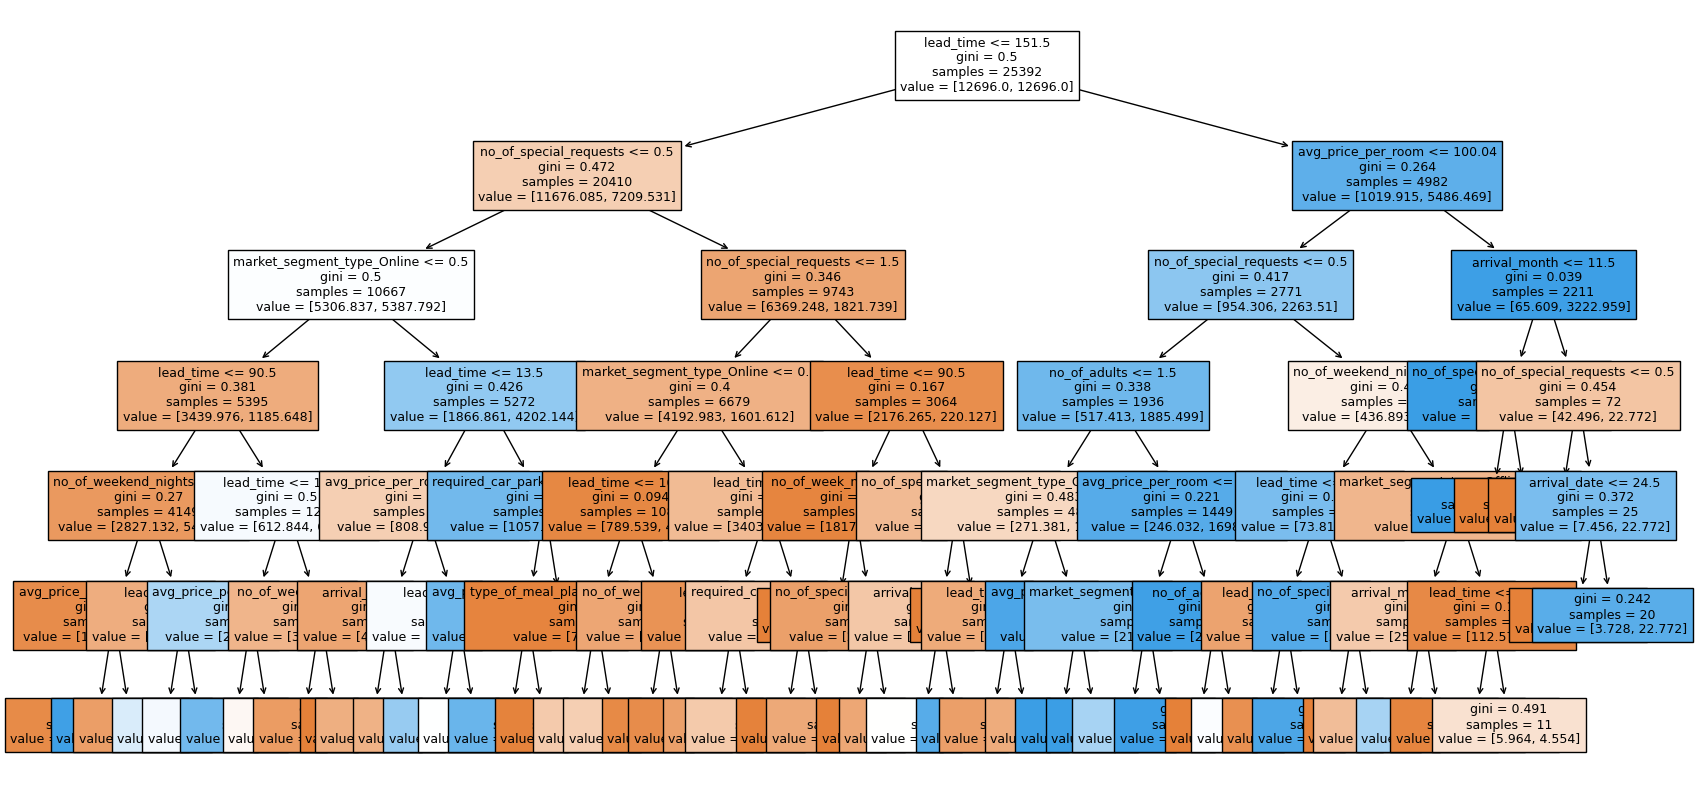

In [190]:
# Visualizing the pre-pruned decision tree
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [191]:
# Text report showing the rules of a decision tree -
print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 196.50
|   |   |   |   |   |   |--- weights: [1736.39, 132.08] class: 0
|   |   |   |   |   |--- avg_price_per_room >  196.50
|   |   |   |   |   |   |--- weights: [0.75, 25.81] class: 1
|   |   |   |   |--- no_of_weekend_nights >  0.50
|   |   |   |   |   |--- lead_time <= 68.50
|   |   |   |   |   |   |--- weights: [960.27, 223.16] class: 0
|   |   |   |   |   |--- lead_time >  68.50
|   |   |   |   |   |   |--- weights: [129.73, 160.92] class: 1
|   |   |   |--- lead_time >  90.50
|   |   |   |   |--- lead_time <= 117.50
|   |   |   |   |   |--- avg_price_per_room <= 93.58
|   |   |   |   |   |   |--- weights: [214.72, 227.72] class: 1
|   |   |   |   |   |--- avg_price_per_room >  93.58
|   |   |   |   |   |   |--- weights: [82.76, 285.41] 

* Uing the above extracted decision rules we can make interpretations from the decision tree.

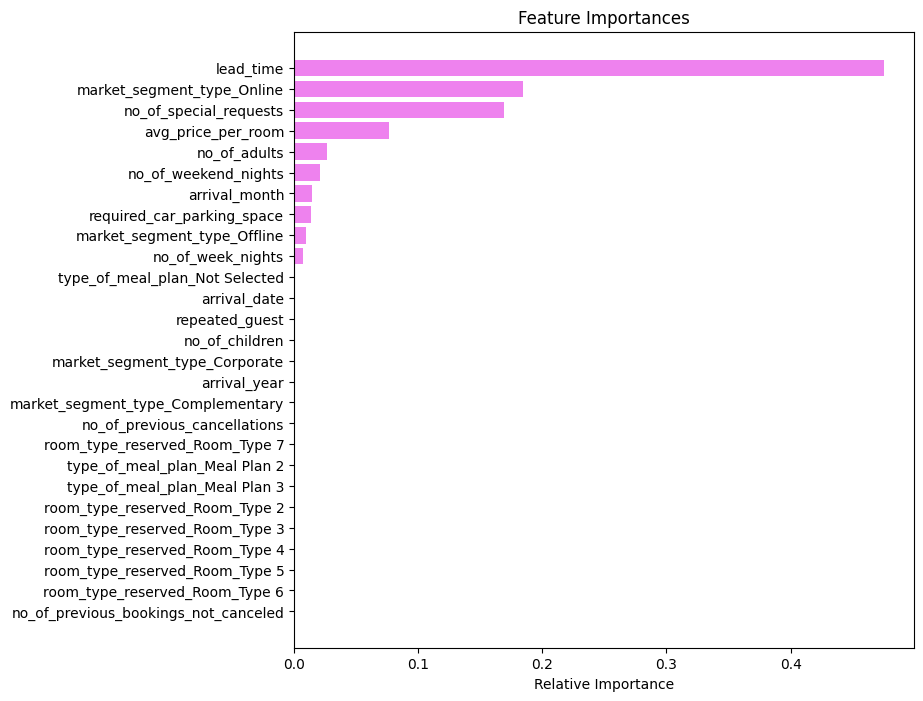

In [193]:
# importance of features in the tree building after pre pruning

importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* The most important features are lead time, market segment type online, and number of special requests.

#### Decision Tree (Post pruning)

In [196]:
# Pruning The tree by minimal cost complexity method
clf = DecisionTreeClassifier(random_state=1, class_weight="balanced")
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities

In [197]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000,0.008
1,0.000,0.008
2,0.000,0.008
3,0.000,0.008
4,0.000,0.008
...,...,...
1837,0.009,0.328
1838,0.010,0.338
1839,0.013,0.351
1840,0.034,0.419


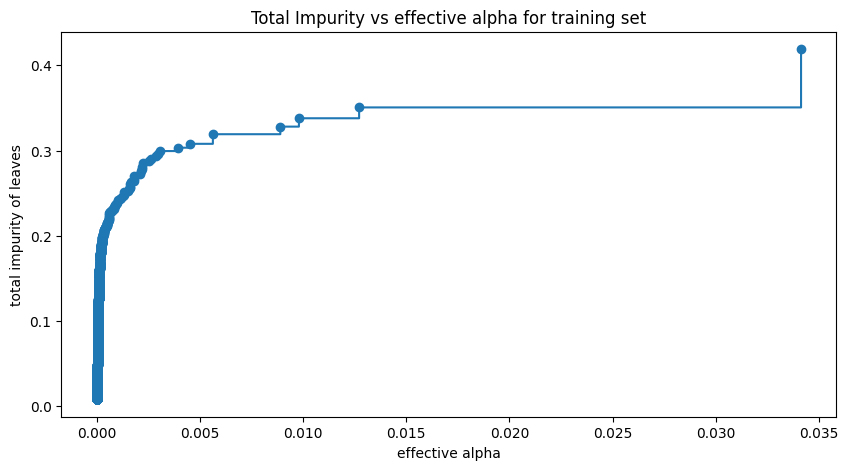

In [198]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Next, we train a decision tree using the effective alphas. The last value
in ``ccp_alphas`` is the alpha value that prunes the whole tree,
leaving the tree, ``clfs[-1]``, with one node.

In [200]:
# selecting every 10th alpha for faster computing
selected_ccp_alphas = [ccp_alphas[i] for i in range(0, len(ccp_alphas), len(ccp_alphas)//10)]

# Checking the best model through pruning
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight="balanced"
    )
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.08117914389136949


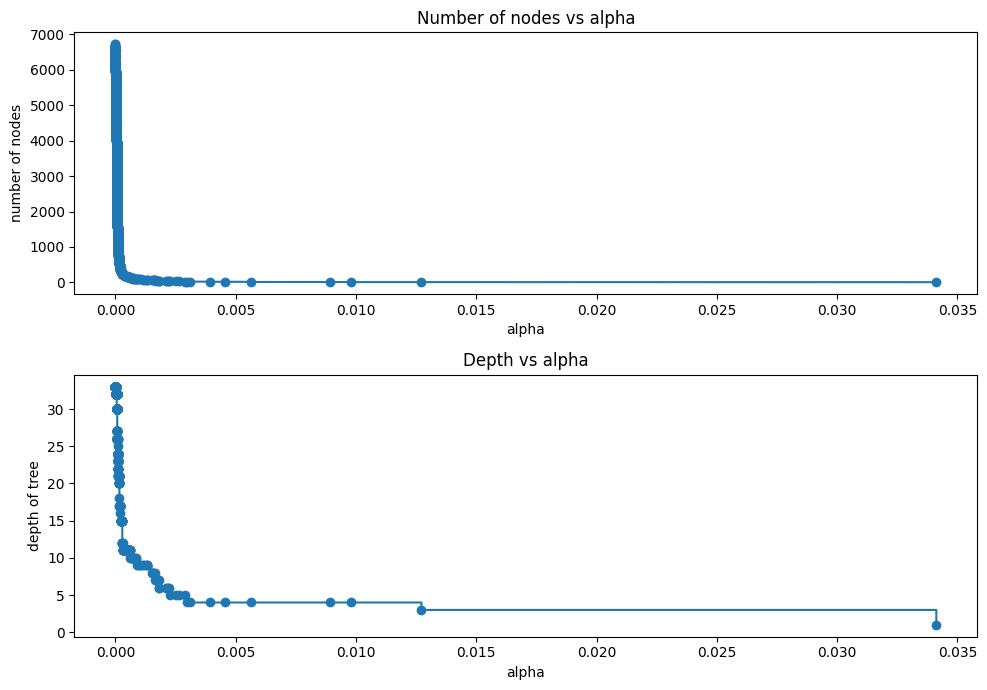

In [201]:
# visualizing the effects of pruning on decision tree
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

* Both the number of nodes and the depth of the tree decrease as ccp_alpha increases, reflecting the pruning process's effect. Pruning helps in reducing model complexity and preventing overfitting by simplifying the tree.

In [203]:
#  evaluating the performance of a series of decision tree
f1_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = f1_score(y_train, pred_train)
    f1_train.append(values_train)

f1_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = f1_score(y_test, pred_test)
    f1_test.append(values_test)

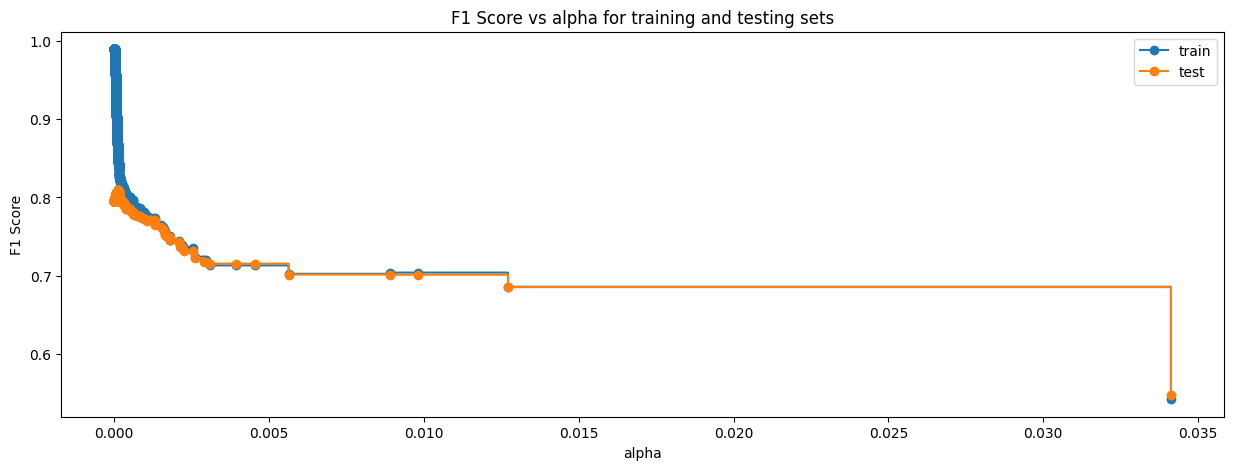

In [204]:
# visualizing how the F1 score changes with different values of the alpha 
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("F1 Score")
ax.set_title("F1 Score vs alpha for training and testing sets")
ax.plot(ccp_alphas, f1_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, f1_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [205]:
# identifying the best-performing decision tree model based on the F1 score
index_best_model = np.argmax(f1_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.00012267633155167034,
                       class_weight='balanced', random_state=1)


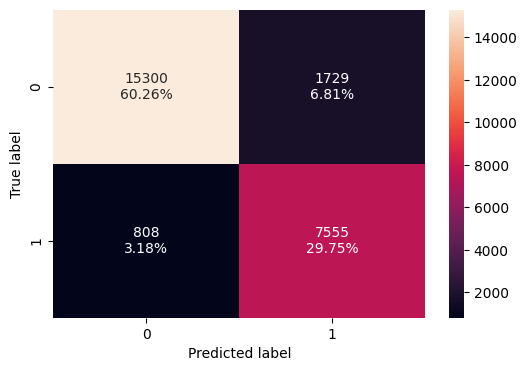

In [206]:
# Checking the confusion matrix on the training data.
confusion_matrix_sklearn(best_model, X_train, y_train)

In [207]:
# Checking performance on the training data.
decision_tree_post_perf_train = model_performance_classification_sklearn(
    best_model, X_train, y_train
)
decision_tree_post_perf_train

,Accuracy,Recall,Precision,F1
0,0.900,0.903,0.814,0.856


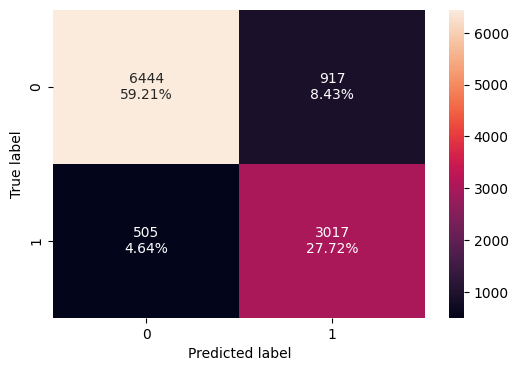

In [208]:
# Checking the confusion matrix on the test data.
confusion_matrix_sklearn(best_model, X_test, y_test)

In [209]:
# Checking performance on the test data.
decision_tree_post_perf_test = model_performance_classification_sklearn(
    best_model, X_test, y_test
)
decision_tree_post_perf_test ## Complete the code to create confusion matrix for test data on best model

,Accuracy,Recall,Precision,F1
0,0.869,0.857,0.767,0.809


* Training data shows better metrics than testing data, indicating that we still have some overfitting. However, we will keep it as is, as it's still showing the best F1 metrics.

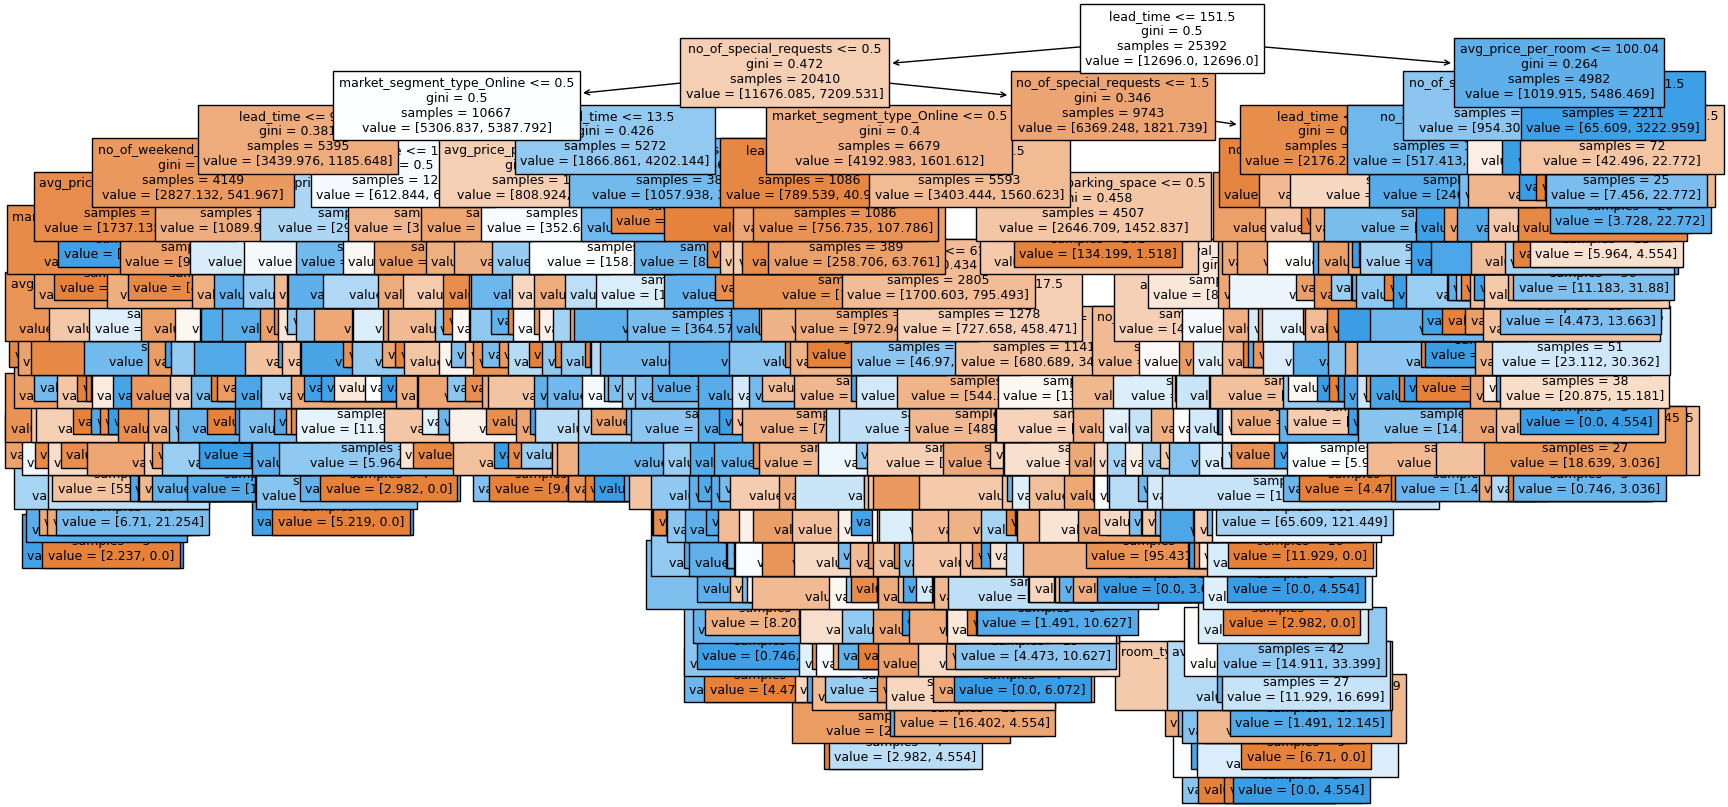

In [211]:
# Visualizing the Post-Pruned Tree
plt.figure(figsize=(20, 10))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [212]:
# Text report showing the rules of a decision tree

print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 196.50
|   |   |   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |   |   |--- lead_time <= 16.50
|   |   |   |   |   |   |   |   |--- avg_price_per_room <= 68.50
|   |   |   |   |   |   |   |   |   |--- weights: [207.26, 10.63] class: 0
|   |   |   |   |   |   |   |   |--- avg_price_per_room >  68.50
|   |   |   |   |   |   |   |   |   |--- arrival_date <= 29.50
|   |   |   |   |   |   |   |   |   |   |--- no_of_adults <= 1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- no_of_adults >  1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |   |   |   |   |   |--- arrival_date >  29.50
|   |   |   |

* We can see that the observation we got from the pre-pruned tree is also matching with the decision tree rules of the post pruned tree.

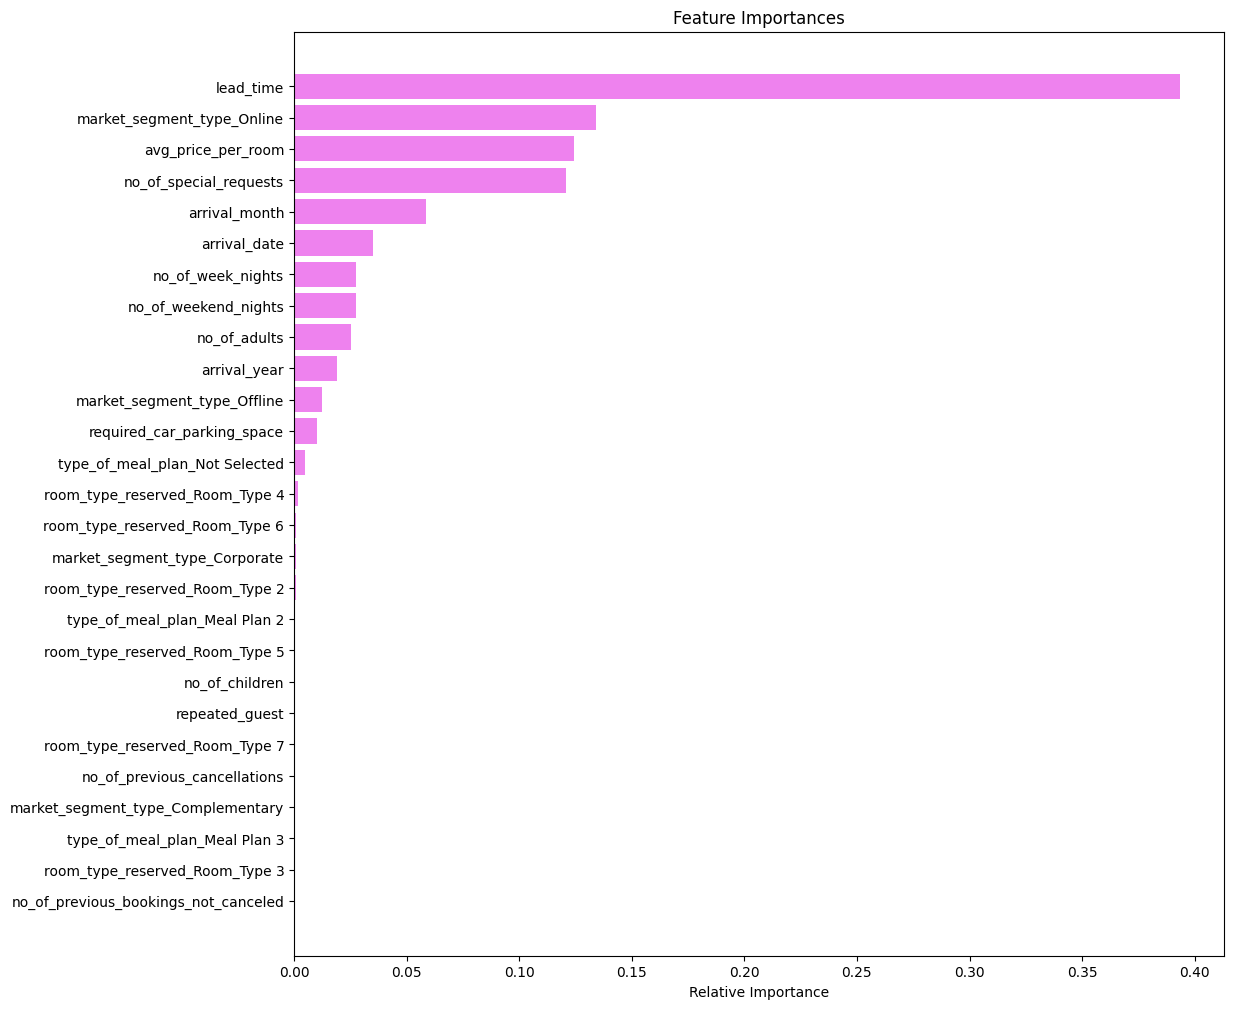

In [214]:
# Checking feature importance
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* Most important features are lead time, market segment type online, and average price per room.

## Model Performance Comparison and Conclusions

In [217]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_post_perf_train.T,
        
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.994,0.831,0.900
Recall,0.987,0.786,0.903
Precision,0.996,0.724,0.814
F1,0.991,0.754,0.856


In [218]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        decision_tree_perf_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_post_perf_test.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.871,0.835,0.869
Recall,0.810,0.783,0.857
Precision,0.795,0.728,0.767
F1,0.803,0.754,0.809


* We will choose Post Pruning model as it shows the highest F1 value and it can be used to predict correctly ~80% booking cancelations

## Actionable Insights and Recommendations

-  Use the prediction model to estimate cancellations and adjust the number of bookings sold accordingly, to compensate for potential booking cancellations and loss of revenue.
-  Implement higher fees for cancellations to reduce income loss.
-  Offer lower rates for non-refundable bookings to secure earnings.
-  Apply stricter cancellation policies during peak months (e.g., Aug, Sep, Oct) and more lenient ones in off-peak months (e.g., Jan, Feb, Mar).
-  Charge more for cancellations close to the check-in date to cover potential profit loss.
-  Provide discounts or incentives for longer bookings to reduce cancellations and increase revenue.
-  Use dynamic pricing based on demand and offer booking insurance to manage cancellations and optimize income.
-  Consider discontinuing offering Meal Plan 3, as it is almost never selected.
-  Continue monitoring customer behavior to build even better predictive models in the future.